# PISA 2012 Exploration 
## by Maryna Misyura

## Preliminary Wrangling

> This document explores a dataset containing PISA 2012 survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a conventional school test.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a  dataframe, print statistics
pisa = pd.read_csv(r'C:\Users\Marin\UGitCourse\csv\pisa2012.csv', encoding = "latin-1",
                    usecols=['CNT', 'PV1MATH','PV1READ', 'STIDSTD', 'PV1SCIE','ST04Q01','ST01Q01', 'SCHOOLID', 'ESCS','ST29Q04','ST57Q01','INTMAT', 'LMINS', 'MMINS','SMINS', 'SUBNORM', 'ST35Q04','ST35Q05','ST35Q06', 'ANXMAT', 'SCMAT'])
#There are 635 columns in the dataset. I'll have to choose just some of them for the analysis

In [3]:
#rename some columns 
pisa = pisa.rename(columns={'CNT': 'Country', 
                            'PV1MATH': 'Math_score', 
                            'PV1READ': 'Reading_score', 
                            'PV1SCIE': 'Science_score', 
                            'ST04Q01': 'Gender', 
                            'ST01Q01': 'Grade', 
                            'SCHOOLID': 'School_ID',
                            'STIDSTD': 'Student_ID',
                            'ESCS' : 'Socio_economic_status',
                            'ST29Q04': 'Students_enjoy_math',
                            'ST57Q01':'Homework_hours',
                            'INTMAT':'Math_interest',
                            'LMINS':'Language_in_school_min',
                            'MMINS':'Math_in_school_min',
                            'SMINS':'Science_in_school_min',
                            'SUBNORM':'Math_motivation',
                            'ST35Q04': 'Parents_math_important',
                            'ST35Q05':'Parents_math_for_career',
                            'ST35Q06':'Parents_like_math',
                            'ANXMAT':'Math_anxiety',
                            'SCMAT':'Math_self_concept'})

In [4]:
#print statistics
print(pisa.shape)

(485490, 21)


In [5]:
print(pisa.dtypes)

Country                     object
School_ID                    int64
Student_ID                   int64
Grade                        int64
Gender                      object
Students_enjoy_math         object
Parents_math_important      object
Parents_math_for_career     object
Parents_like_math           object
Homework_hours             float64
Math_anxiety               float64
Socio_economic_status      float64
Math_interest              float64
Language_in_school_min     float64
Math_in_school_min         float64
Math_self_concept          float64
Science_in_school_min      float64
Math_motivation            float64
Math_score                 float64
Reading_score              float64
Science_score              float64
dtype: object


In [6]:
#Number of countries
print(pisa.Country.unique().shape[0])

68


In [7]:
print(pisa.describe())
#Very strange: max Grade=96 !?

           School_ID     Student_ID          Grade  Homework_hours  \
count  485490.000000  485490.000000  485490.000000   301367.000000   
mean      240.152197    6134.066201       9.813323        5.493770   
std       278.563016    6733.144944       3.734726        5.383815   
min         1.000000       1.000000       7.000000        0.000000   
25%        61.000000    1811.000000       9.000000        2.000000   
50%       136.000000    3740.000000      10.000000        4.000000   
75%       291.000000    7456.000000      10.000000        7.000000   
max      1471.000000   33806.000000      96.000000       30.000000   

        Math_anxiety  Socio_economic_status  Math_interest  \
count  314764.000000          473648.000000  316708.000000   
mean        0.152647              -0.265546       0.212424   
std         0.955031               1.131791       1.004716   
min        -2.370000              -5.950000      -1.780000   
25%        -0.470000              -1.000000      -0.340000 

In [8]:
base_color = sb.color_palette()[0]

In [9]:
enjoy_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = enjoy_order)
pisa['Students_enjoy_math'] = pisa['Students_enjoy_math'].astype(ordered_cat)
pisa['Parents_like_math'] = pisa['Parents_like_math'].astype(ordered_cat)
pisa['Parents_math_for_career'] = pisa['Parents_math_for_career'].astype(ordered_cat)
pisa['Parents_math_important'] = pisa['Parents_math_important'].astype(ordered_cat)

### What is the structure of your dataset?

> There are 485490 students in the dataset from 68 different countries. 
I chose these features to investigate:<br>
- Numeric: Homework_hours, Socio_economic_status, Math_score, Reading_score, Science_score, Math_interest, Math_motivation, Math_anxiety, Math_self_concept. <br>
- Categorical: Country, Grade, Gender, School_ID. <br>
- Variables Students_enjoy_math, Parents_like_math, Parents_math_important, Parents_math_for_career are ordered categorical variables with the following levels: <br>
'Strongly disagree', 'Disagree', 'Agree', 'Strongly agree' <br>

### What is/are the main feature(s) of interest in your dataset?

> I'm very interested in finding out what features are best in predicting the math, reading and science test results.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Socio_economic_status of students will have a big effect on the scores, disadvantaged students will be underperforming. I also hope that if students enjoy subject and independent time studying (homework) they will perform better.<br>
It is interesting if gender of a student has influence on test result.


## Univariate Exploration

> Quick view on numeric variables.

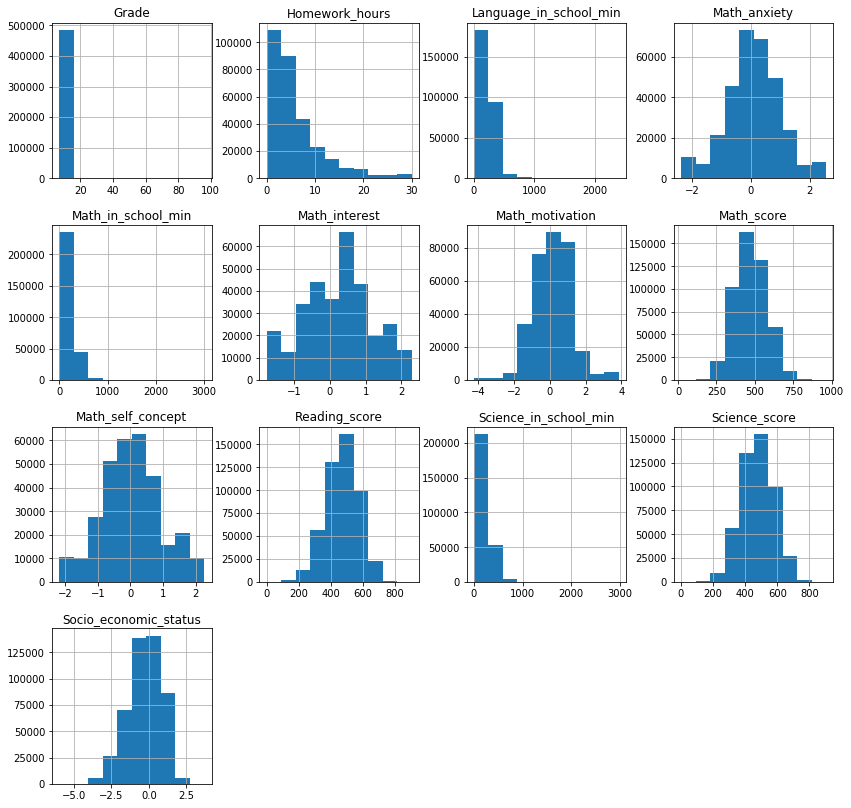

In [10]:
pisa[['Grade', 'Gender', 'Homework_hours','Socio_economic_status','Math_interest', 'Language_in_school_min', 
      'Math_in_school_min', 'Science_in_school_min', 'Math_motivation', 
      'Parents_math_important', 'Math_self_concept', 'Math_score', 'Math_anxiety','Reading_score','Science_score']].hist(figsize=(14,14));


Questions:
- Grade variable is right skewed
- variables ..study_min - 2000min~33hours study a week is too much. Is this an error?
- math(reading, science) scores near 0 or 1000 - who are those students?

> *1) distribution of the main variables: math, reading and science scores.*

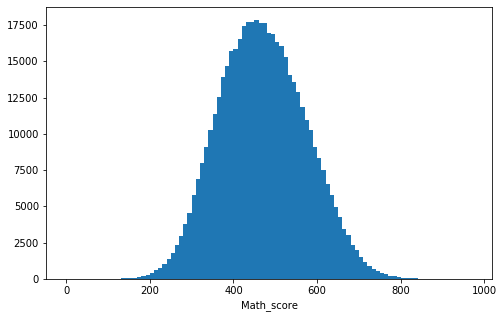

In [11]:
binsize = 10
bins = np.arange(0, pisa['Math_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.show()

*Are values near zero and 1000 are outliers, mistakes or real data points?*

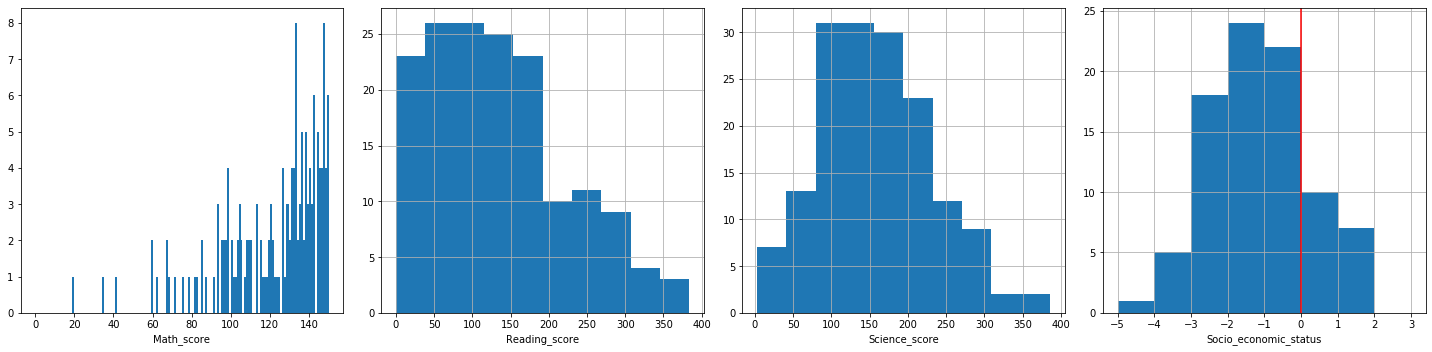

In [12]:
#Low math scores 
binsize = 1
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=[20,5])
plt.subplot(1, 4, 1)
bins = np.arange(0, 150+binsize, binsize)
#plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.subplot(1, 4, 2)
pisa.query('Math_score<=150')['Reading_score'].hist()
plt.xlabel('Reading_score')
plt.subplot(1, 4, 3)
pisa.query('Math_score<=150')['Science_score'].hist()
plt.xlabel('Science_score')
plt.subplot(1, 4, 4)
bins_ESCS = [-5, -4, -3, -2, -1, 0, 1, 2, 3]
pisa.query('Math_score<=150')['Socio_economic_status'].hist(bins = bins_ESCS)
plt.axvline(x=0, color='red')
plt.xlabel('Socio_economic_status')
fig.tight_layout()

*All students, who scored <ins>low</ins> on the math PISA test, also get low scores in reading and science. Mostly it's disadvantaged students.* <br>

*Interesting that Reading test results for such students are significantly skewed right. Not sufficient reading skills maybe be  one of the reasons for low math test results.*

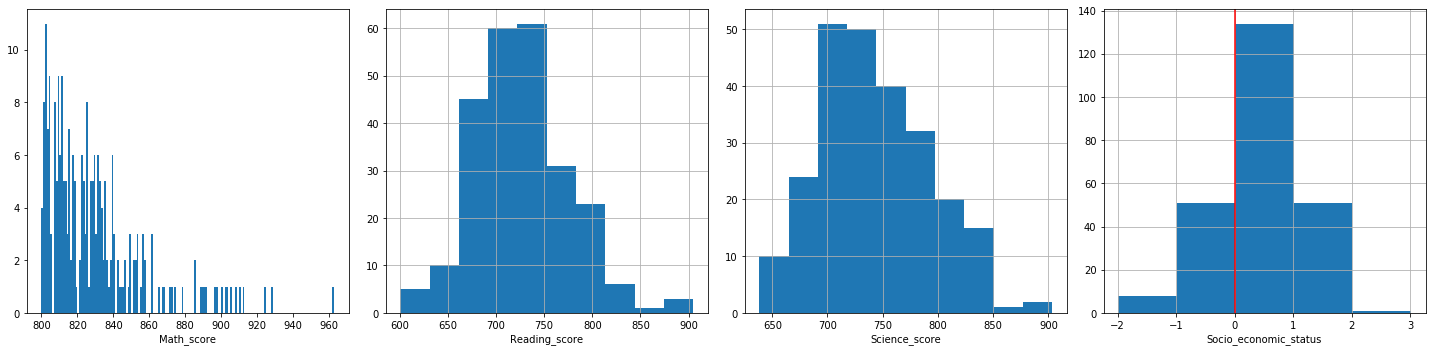

In [13]:
#Big math scores
binsize = 1
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=[20,5])
plt.subplot(1, 4, 1)
bins = np.arange(800, pisa['Math_score'].max()+binsize, binsize)
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.subplot(1, 4, 2)
pisa.query('Math_score>=800')['Reading_score'].hist()
plt.xlabel('Reading_score');
plt.subplot(1, 4, 3)
pisa.query('Math_score>=800')['Science_score'].hist()
plt.xlabel('Science_score');
plt.subplot(1, 4, 4)
bins = np.arange(pisa.query('Math_score>=800').Socio_economic_status.min(), pisa.query('Math_score>=800').Socio_economic_status.max()+1,1)
pisa.query('Math_score>=800')['Socio_economic_status'].hist(bins = bins)
plt.axvline(x=0, color='red')
plt.xlabel('Socio_economic_status')
fig.tight_layout()

*All students, who scored <ins>high</ins> on the math PISA test, also get high scores in reading and science. It's mostly students with higher social, economic and cultural status* <br>

*It looks like all those were valid data points.*

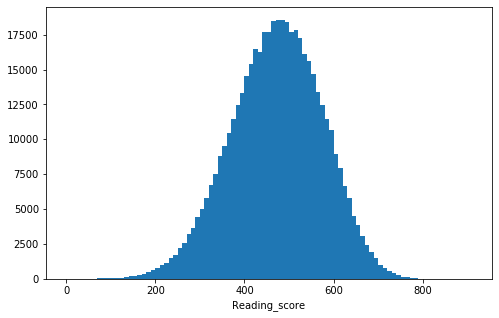

In [14]:
binsize = 10
bins = np.arange(0, pisa['Reading_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Reading_score', bins = bins)
plt.xlabel('Reading_score')
plt.show()

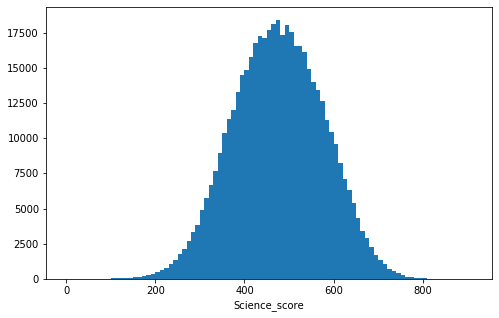

In [15]:
binsize = 10
bins = np.arange(0, pisa['Science_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Science_score', bins = bins)
plt.xlabel('Science_score')
plt.show()

*All plots for test scores are normally distributed. I guess the PISA test is organized that way to get normally distributed scores as a result.*

>*2) How are students distributed among the countries?*

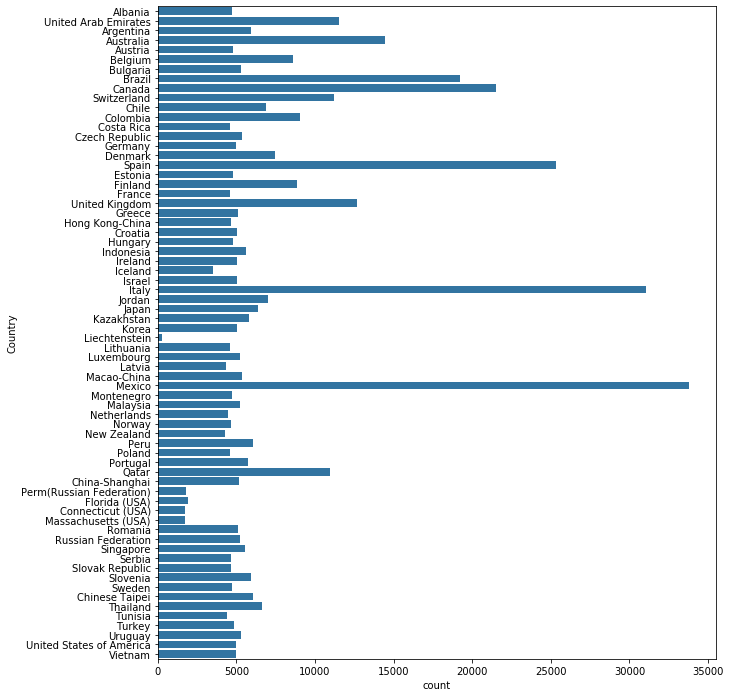

In [16]:
plt.figure(figsize = [10, 12])
sb.countplot(data=pisa, y = 'Country', color = base_color );

*Most countries have around 5000 students participating or more. Countries with less students are actually subregions of other countries. I think it would be more interesting to choose two-three countries and investigate them more. Or maybe choose different states of USA and compare them.*

> 3) Next I want to investigate Socio_economic_status.<br>
Socio_economic_status is the PISA index of economic, social and cultural status (ESCS) created using student reports on parental occupation, the highest level of parental education, and an index of home possessions related to family wealth, home educational resources and possessions related to “classical” culture in the family home.<br>
A negative value merely indicates that the respondents answered less positively than all respondents did on average across OECD countries.

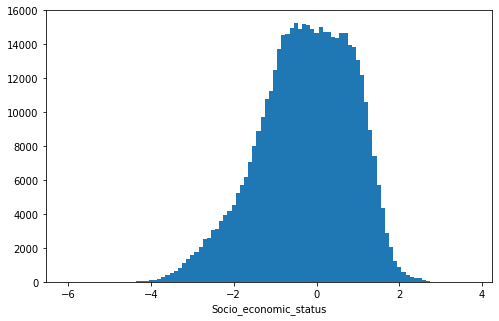

In [17]:
binsize = 0.1
bins = np.arange(pisa['Socio_economic_status'].min() - binsize, pisa['Socio_economic_status'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Socio_economic_status', bins = bins)
plt.xlabel('Socio_economic_status')
plt.show()

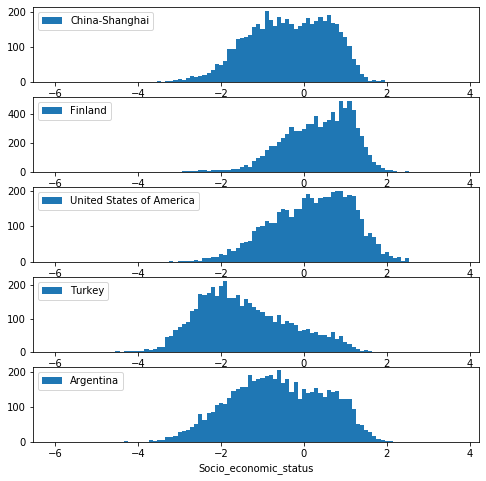

In [18]:
#Socio_economic_status for 5 different countries
plt.figure(figsize = [8, 8]) 
plt.subplot(5, 1, 1)
plt.hist(data = pisa[pisa['Country'] == 'China-Shanghai'], x = 'Socio_economic_status', bins = bins, label='China-Shanghai');
plt.legend(loc='upper left');
plt.subplot(5, 1, 2)
plt.hist(data = pisa[pisa['Country'] == 'Finland'], x = 'Socio_economic_status', bins = bins, label='Finland');
plt.legend(loc='upper left');
plt.subplot(5, 1, 3)
plt.hist(data = pisa[pisa['Country'] == 'United States of America'], x = 'Socio_economic_status', bins = bins, label='United States of America');
plt.legend(loc='upper left');
plt.subplot(5, 1, 4)
plt.hist(data = pisa[pisa['Country'] == 'Turkey'], x = 'Socio_economic_status', bins = bins, label='Turkey');
plt.legend(loc='upper left');
plt.subplot(5, 1, 5)
plt.hist(data = pisa[pisa['Country'] == 'Argentina'], x = 'Socio_economic_status', bins = bins, label='Argentina');
plt.legend(loc='upper left');
plt.xlabel('Socio_economic_status');


Socio_economic_status is slightly skewed left - average for all countries. I would like later to cut Socio_economic_status into quarters to be able to compare 

> 4) Grade distibution

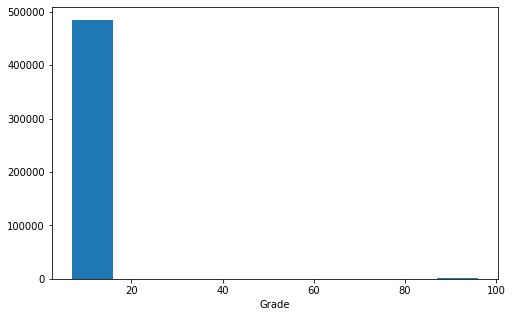

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade')
plt.xlabel('Grade')
plt.show()

As I noticed earlier there is an outlier. 

In [20]:
print(pisa[pisa['Grade']>14].Grade.value_counts())
#Percent of student body
100* pisa[pisa['Grade']>14].Country.value_counts()/pisa.Country.count()

96    873
Name: Grade, dtype: int64


Portugal     0.105666
Vietnam      0.038930
Belgium      0.023481
Lithuania    0.009269
Latvia       0.002472
Name: Country, dtype: float64

PISA-2012-technical-report-final.pdf file indicates that values for Grade column should be from 7 to 14. <br>
I think 96 means that the grade is unknown. In all countries such values are 0.1% or less.<br>
It would be safe to fill them with mean value.

In [21]:
pisa[((pisa['Grade']<=14) & ((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')|(pisa['Country']=='Latvia')))].groupby('Country')['Grade'].mean().round()

Country
Belgium      10.0
Latvia        9.0
Lithuania     9.0
Portugal      9.0
Vietnam      10.0
Name: Grade, dtype: float64

In [22]:
pisa.loc[((pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')) & (pisa.Grade == 96), ['Grade']] = 10
pisa.loc[((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Latvia')) & (pisa.Grade == 96), ['Grade']] = 9

In [23]:
#Test
print(pisa[pisa['Grade']>20].shape)
pisa[pisa['Country']=='Lithuania'].Grade.value_counts()

(0, 21)


9     3806
10     525
8      278
7        7
11       2
Name: Grade, dtype: int64

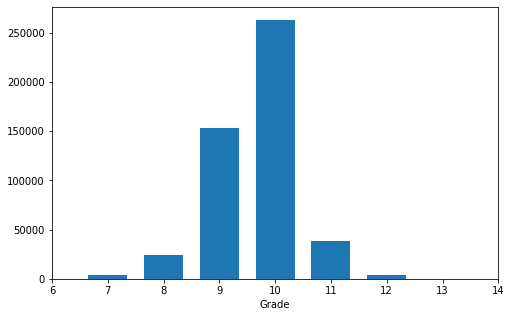

'Relative_grade'

In [24]:
bin_edges = np.arange(6.5, 13.5, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(6, 15, 1))
plt.xlabel('Grade')
plt.show()

*Looks like most 15y.o. students around all countries attend 10th grade.*

> *5) Gender distribution*

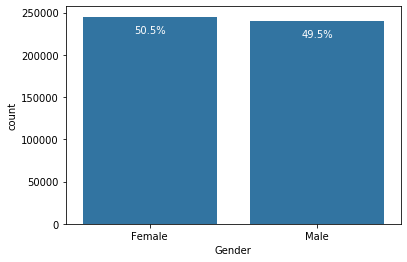

In [25]:
sb.countplot(data = pisa, x = 'Gender', color=base_color);
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = pisa[pisa['Gender']==label.get_text()].shape[0]
    pct_string = '{:0.1f}%'.format(100*count/pisa.shape[0])
    plt.text(loc, count-10000, pct_string, verticalalignment= 'top', horizontalalignment='center',color = 'w')

> *6) School information* <br>
> *School_ID is unique within Country and not within all dataset*

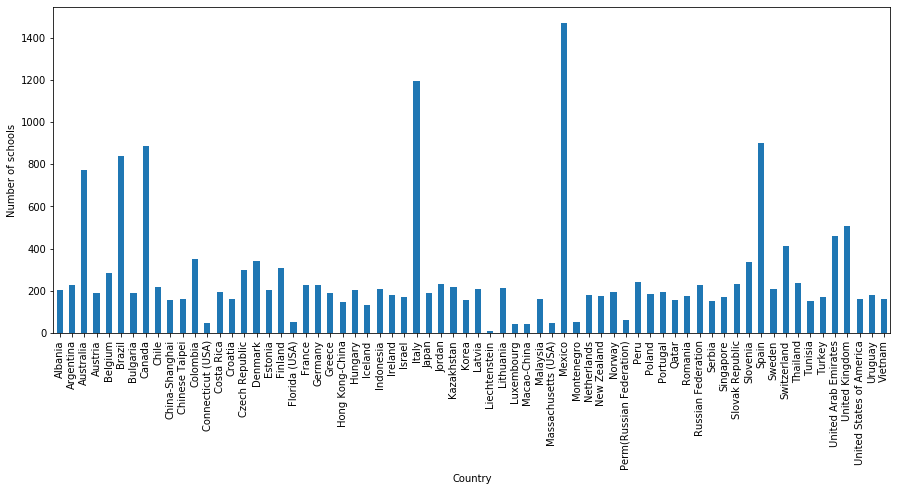

In [26]:
#What is the number of schools in each country participating in PISA?
pisa.groupby(['Country'])['School_ID'].nunique().plot(kind = 'bar', figsize = (15,6));
plt.ylabel('Number of schools');

In [27]:
#What is the average number of students tested from all schools?
pisa.groupby(['Country', 'School_ID']).count()['Student_ID'].mean()

26.54111086813908

*Is there a difference between schools, between average student backgrounds in these schools(Socio_economic_status)?* 
*I'll explore this question in Bivariate Exploration part*

> *6) Time spent on homework at home (Homework set by teacher (hours))*


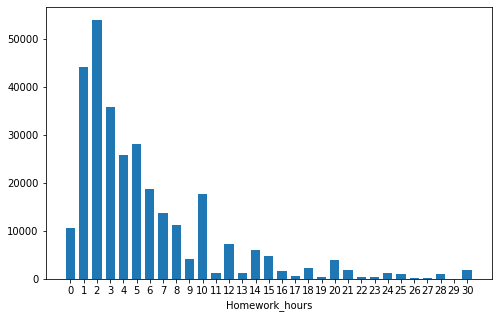

In [28]:
bin_edges = np.arange(-0.5, 31, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Homework_hours', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 31, 1))
plt.xlabel('Homework_hours')
plt.show()

 - *Is the amount of homework assigned by teachers a big influence on test scores?*
 - *Is there a difference in the amount of homework between countries?*
 - *Who spends more time doing homework boys or girls?*
 - *Most students spend on homework 10 hours a week or less.*<br>
*But there are some really hard working students. It's interesting if it would correlate in test scores.*


> *7) Students' and their parents attitude toward mathematics*

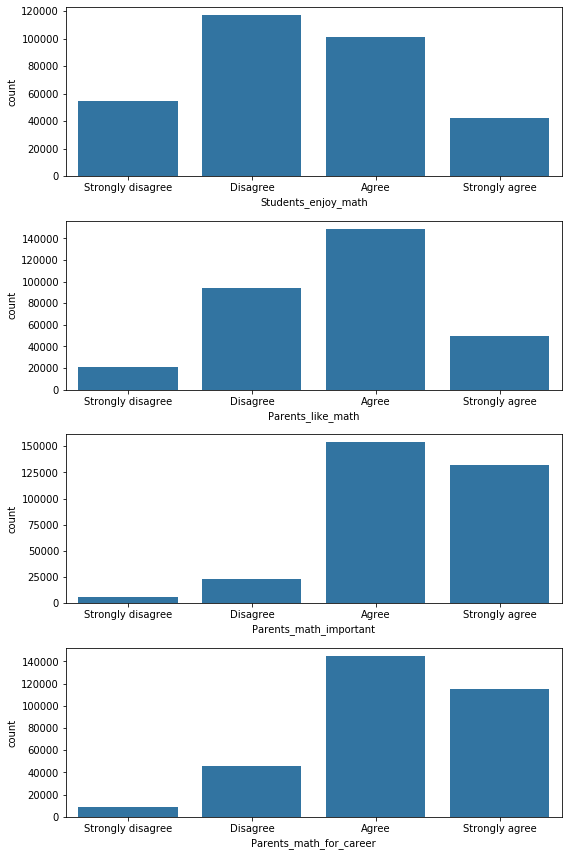

In [29]:
fig, ax = plt.subplots(nrows=4, figsize = [8,12]);
sb.countplot(data = pisa, x = 'Students_enjoy_math', color=base_color, ax = ax[0]);
sb.countplot(data = pisa, x = 'Parents_like_math', color=base_color, ax = ax[1]);
sb.countplot(data = pisa, x = 'Parents_math_important', color=base_color, ax = ax[2]);
sb.countplot(data = pisa, x = 'Parents_math_for_career', color=base_color, ax = ax[3]);
fig.tight_layout()

- *It's sad that overall more students do not enjoy mathematics than enjoy it.*
- *Parents like mathematics more than students*
- *But most parents think that mathematics is important or you will need it for your career. Is it the same for each gender?*
- *Is there correlation with test results?* 

> *8) Learning time in minutes per week in test language regular class periods at school*
- *Language_in_school_min*
- *Math_in_school_min*
- *Science_in_school_min.*

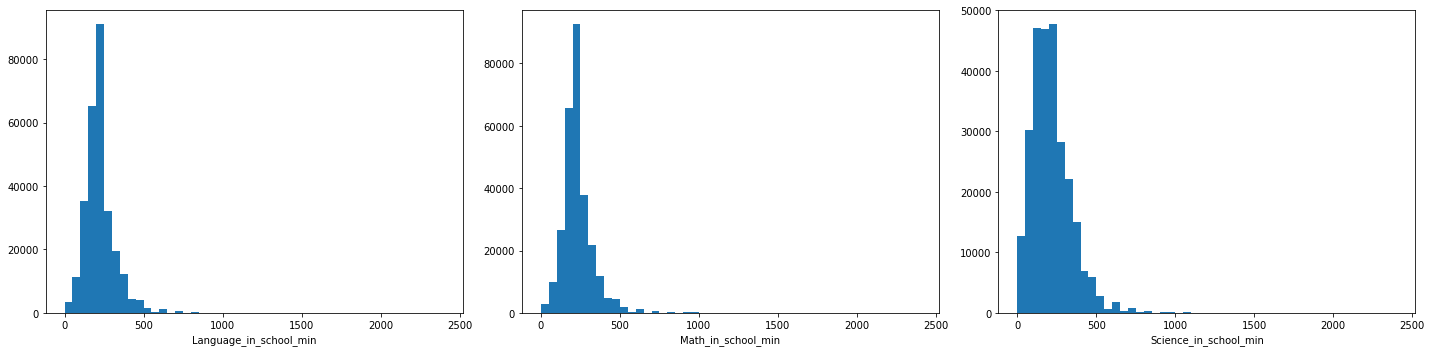

In [30]:
binsize = 50
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=[20,5])
plt.subplot(1, 3, 1)
bins = np.arange(0, pisa.Language_in_school_min.max()+binsize, binsize)
plt.hist(data = pisa, x = 'Language_in_school_min', bins = bins)
plt.xlabel('Language_in_school_min')
plt.subplot(1, 3, 2)
plt.hist(data = pisa, x = 'Math_in_school_min', bins = bins)
plt.xlabel('Math_in_school_min')
plt.subplot(1, 3, 3)
plt.hist(data = pisa, x = 'Science_in_school_min', bins = bins)
plt.xlabel('Science_in_school_min')
fig.tight_layout()

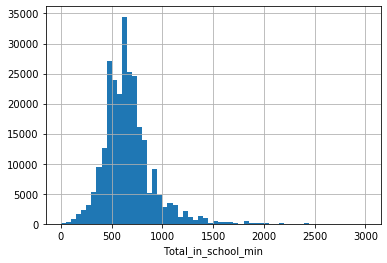

In [31]:
#There are long tails in all three distributions
#The school day can't be longer than 10 hours=600mins, classes are usually 5 day a week, but may be it's 6 days somewhere (like I had in my childhood)
# 10 * 60 * 6 = 3600 mins
#So if I add up all 3 variables, the sum definitely can't be more than 3600 mins

pisa['Total_in_school_min'] = pisa['Language_in_school_min'] + pisa['Math_in_school_min'] + pisa['Science_in_school_min']
binsize = 50
bins = np.arange(0, pisa.Total_in_school_min.max()+binsize, binsize)
pisa.Total_in_school_min.hist(bins=bins)
plt.xlabel('Total_in_school_min');

*The total number study minutes at school is never more than 3600, so while numbers more than 2000min per week look high I think they are valid data points* 
*It would be interesting to investigate who are whose hardworking student* 
*who studying more than 1500 mins per week and if it resulted in higher test results*

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- All test scores: reading, math, science are normally distributed. <br>
- Most countries have around 5000 students participating or more. Countries with less students are actually subregions of other countries. I think it would be more interesting to choose two-three countries and investigate them more.<br>
- Socio_economic_status is slightly skewed left.<br>
- All students, who scored <ins>low</ins> on the math PISA test, also get low scores in reading and science. Mostly it's disadvantaged students. Interesting that Reading test results for such students are significantly skewed right. Not sufficient reading skills is one of the reasons for low math test results.
- All students, who scored <ins>high</ins> on the math PISA test, also get high scores in reading and science. It's mostly students with higher social, economic and cultural status.<br>
- Looks like most 15y.o. students around all countries attend 10th grade.<br>
- Most students spend on homework 10 hours a week or less. But there are some really hard working students who spend up to 30 hours.<br>
- Overall more students do not enjoy mathematics than enjoy it.<br>
- On average parents like mathematics more than students.<br>
- But most parents think that mathematics is important or you will need it for your career. <br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Grade variable had an outlier, some students were 96th grade. After investigation I learnt that this is an error or otherwise specially put number when grade was unknown. Such errors were 1% or less of all students in 5 different countries. I decided to substitute then with mean grade for the country.

## Bivariate Exploration

> *Let's look at correlations between numeric variables*

In [32]:
numeric_features = ['Math_score', 'Reading_score', 'Science_score', 'Socio_economic_status', 'Homework_hours', 
                    'Math_motivation', 'Math_interest', 'Math_anxiety', 'Math_self_concept',
                    'Language_in_school_min', 'Math_in_school_min', 'Science_in_school_min']

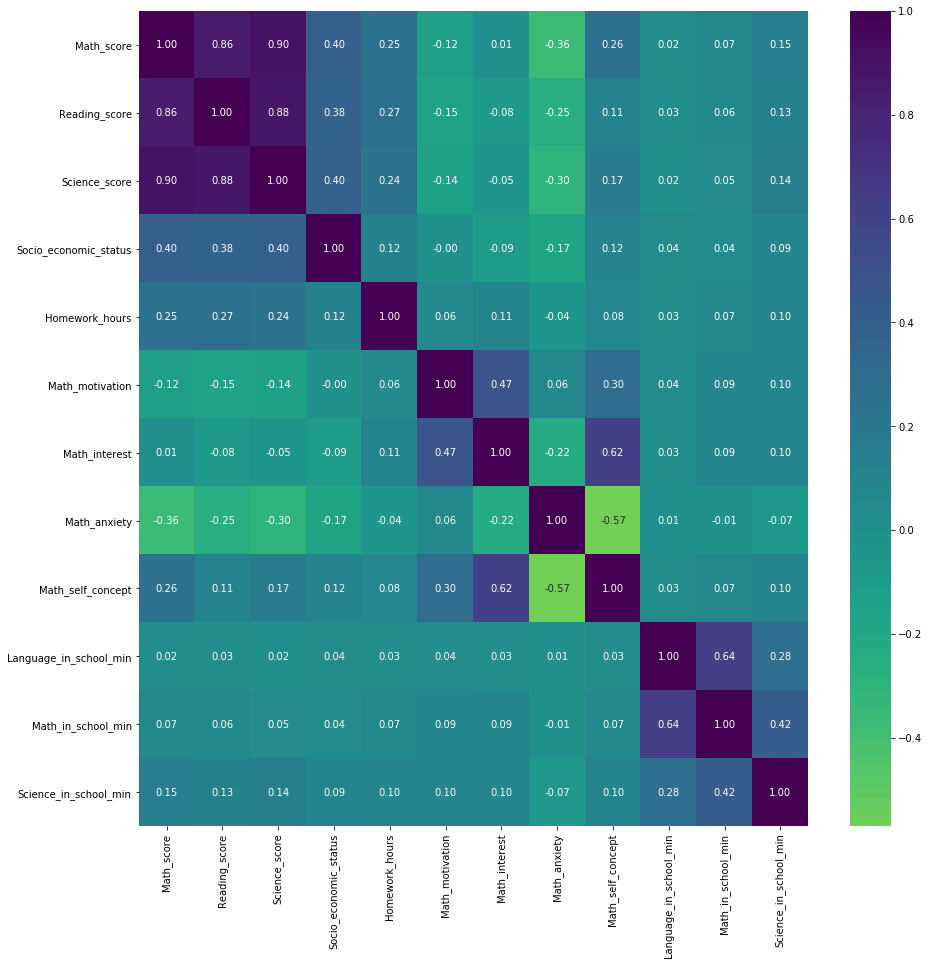

In [33]:
# correlation heatmap
plt.figure(figsize = [15, 15])
sb.heatmap(pisa[numeric_features].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
plt.show()

*- All three subject scores are highly correlated with one another, which tells us the students rarely choose only one subject and neglect others.* <br>
*- Correlation between Social_economic status and test results is around 0.4. Students who have more economical, educational resources and support at home tend to get higher scores.*<br>
*- Amount of time students spend on subjects at school has very small influence on test scores*<br>
*- Homework_hour has weak correlation with test scores.*<br>
*- Math anxiety is negatively correlated with Math_self_concept (person's beliefs about his\her abilities in math)*<br>
*- Math anxiety is negatively correlated not only with math test score, but also with reading and science scores*<br>
*- Unexpectedly beliefs of others about math(Math_motivation) have negative, but weak correlation with test scores*<br>
*- There is correlation 0.62 between person's Math_interst and Math_self_concept(beliefs in being good at math)*
<br><br>
*Let's plot some of the correlations*

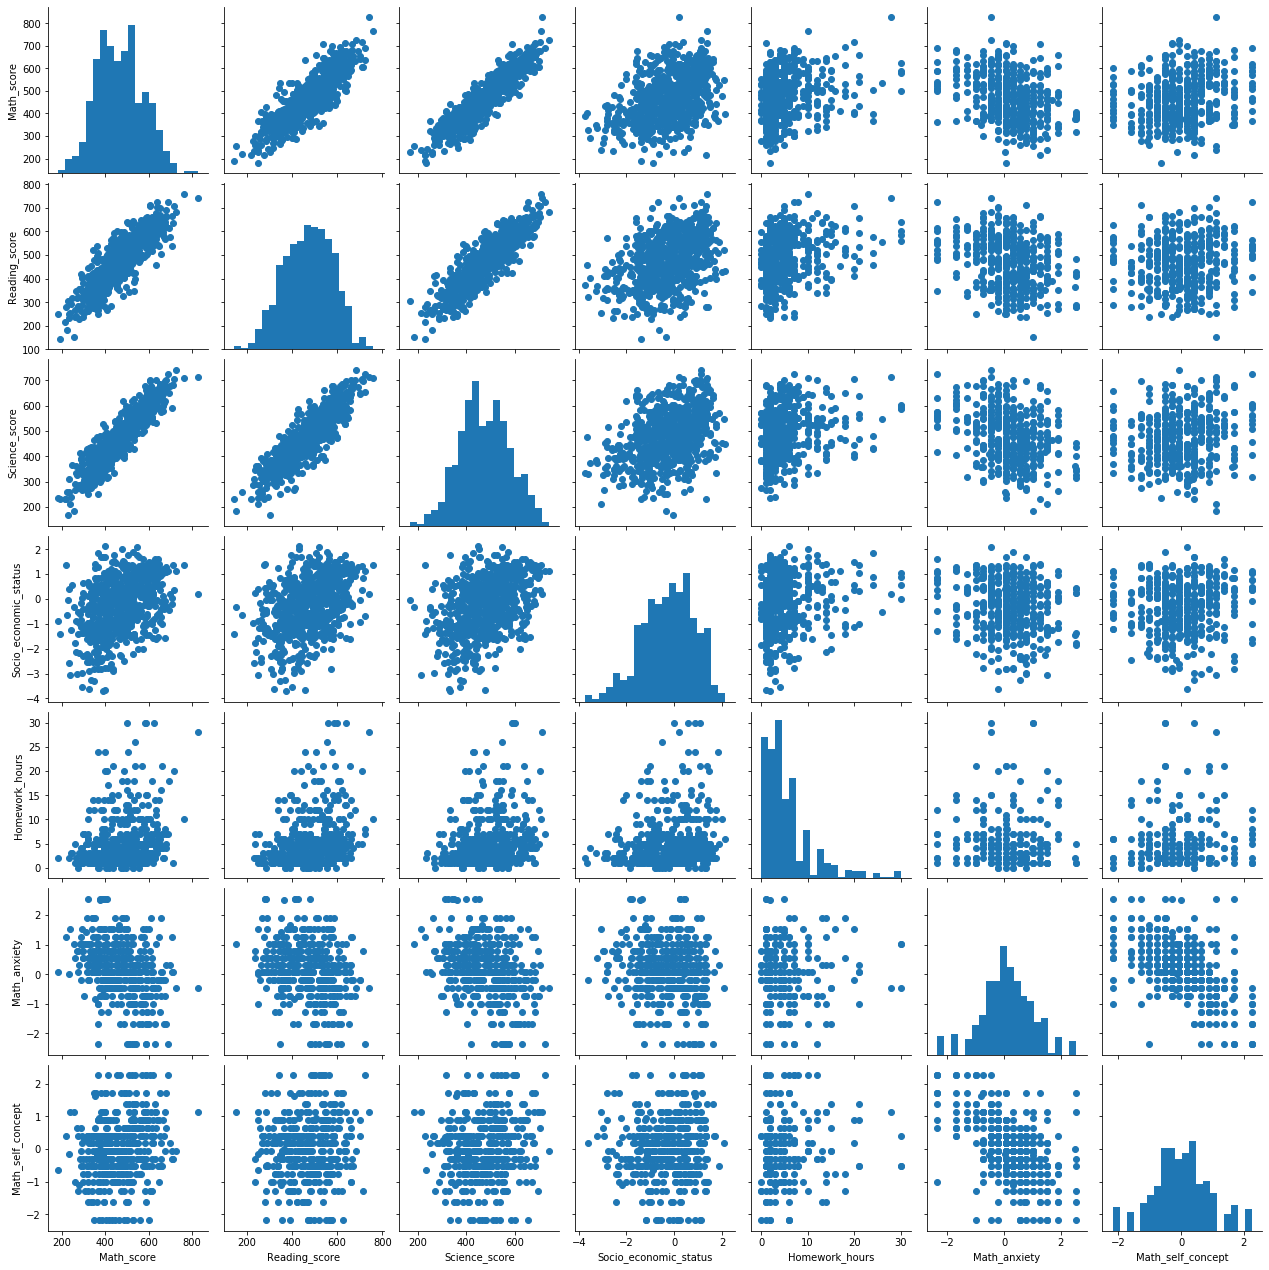

In [34]:
numeric_features = ['Math_score', 'Reading_score', 'Science_score', 'Socio_economic_status', 'Homework_hours', 
                    'Math_anxiety', 'Math_self_concept']
samples = np.random.choice(pisa.shape[0], 700, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_features);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

*Also we can see that disadvantaged students rarely almost never spend more than 10 hours a week on homework.<br> 
And we can see the same in the scores: students who got really bad scores spend less than 6 hours a week on homework.* <br>

> #### Now I want to see how test scores correlate with the categorical variables.<br>
#### Test scores by Country

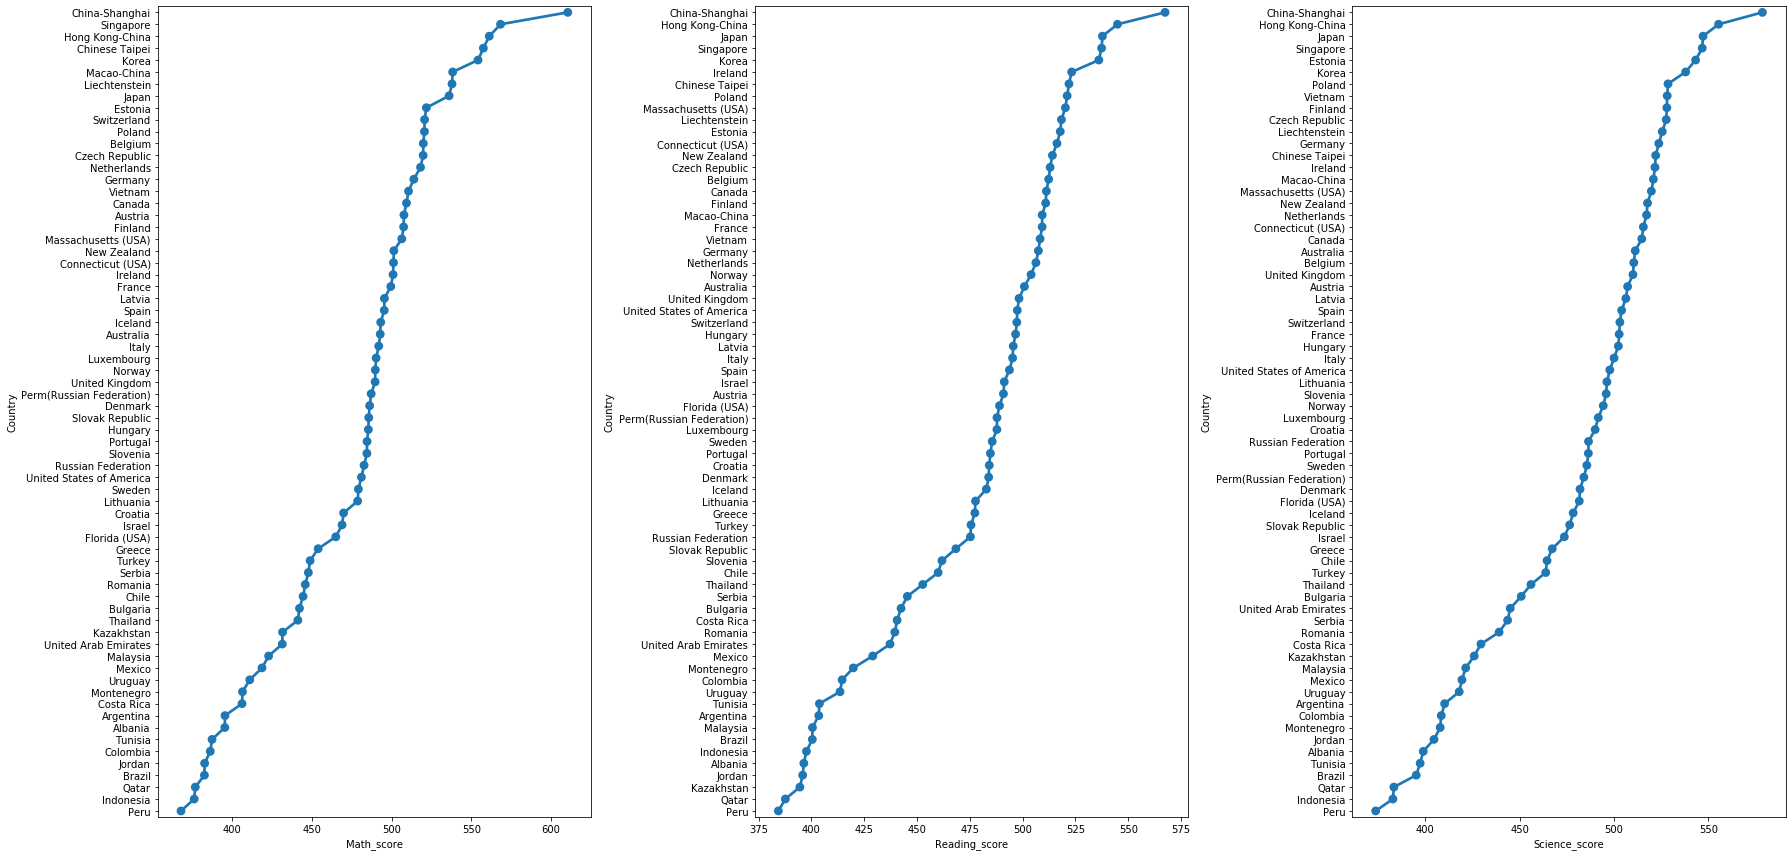

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.pointplot(data = pisa[['Country', 'Math_score']].groupby('Country', as_index=False).mean().sort_values('Math_score', ascending=False), y ='Country', x = 'Math_score') 
plt.subplot(1, 3, 2)
sb.pointplot(data = pisa[['Country', 'Reading_score']].groupby('Country', as_index=False).mean().sort_values('Reading_score', ascending=False), y ='Country', x = 'Reading_score') 
plt.subplot(1, 3, 3)
sb.pointplot(data = pisa[['Country', 'Science_score']].groupby('Country', as_index=False).mean().sort_values('Science_score', ascending=False), y ='Country', x = 'Science_score') 
fig.tight_layout()

*East Asian countries: China-Shanghai, Singapore, Hong Kong-China, Japan, Korea have the highest mean scores in all subjects. Florida has the worst scores among three US states presented in all plots.*

> #### Test scores by Grade

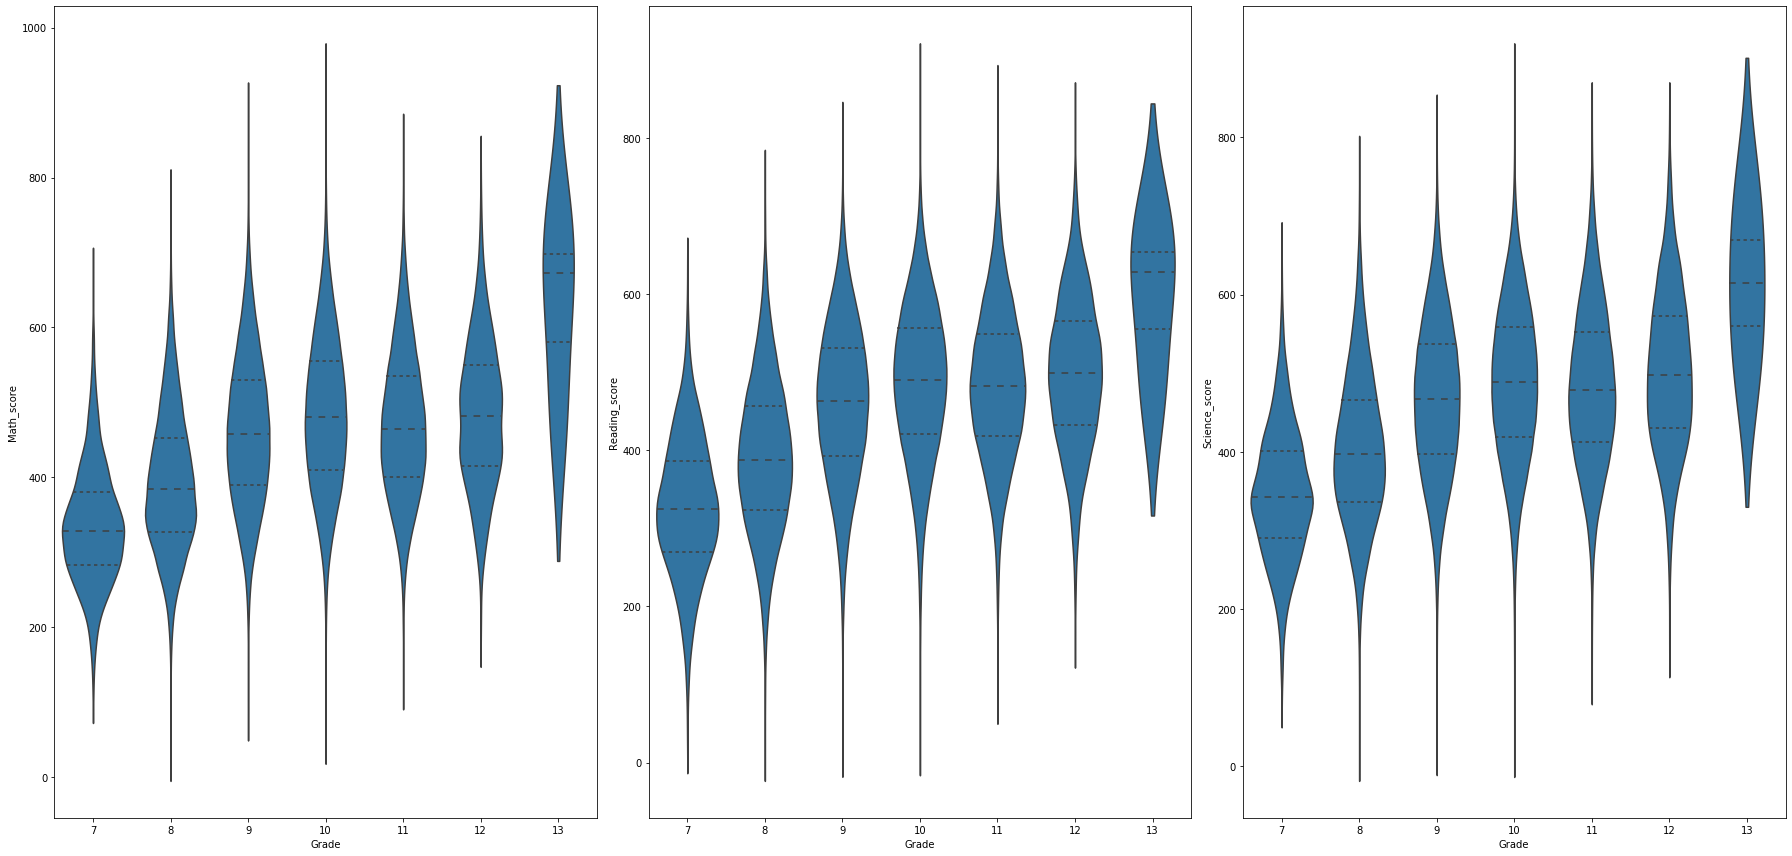

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.violinplot(data = pisa,x='Grade', y = 'Math_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 2)
sb.violinplot(data = pisa,x='Grade', y = 'Reading_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 3)
sb.violinplot(data = pisa,x='Grade', y = 'Science_score', color = base_color, inner = 'quartile')
fig.tight_layout()

*Well, It's not surprising that the score increases with grade, but it is interesting that 10th graders slightly outperform 11th graders.*

>#### Test scores by Gender

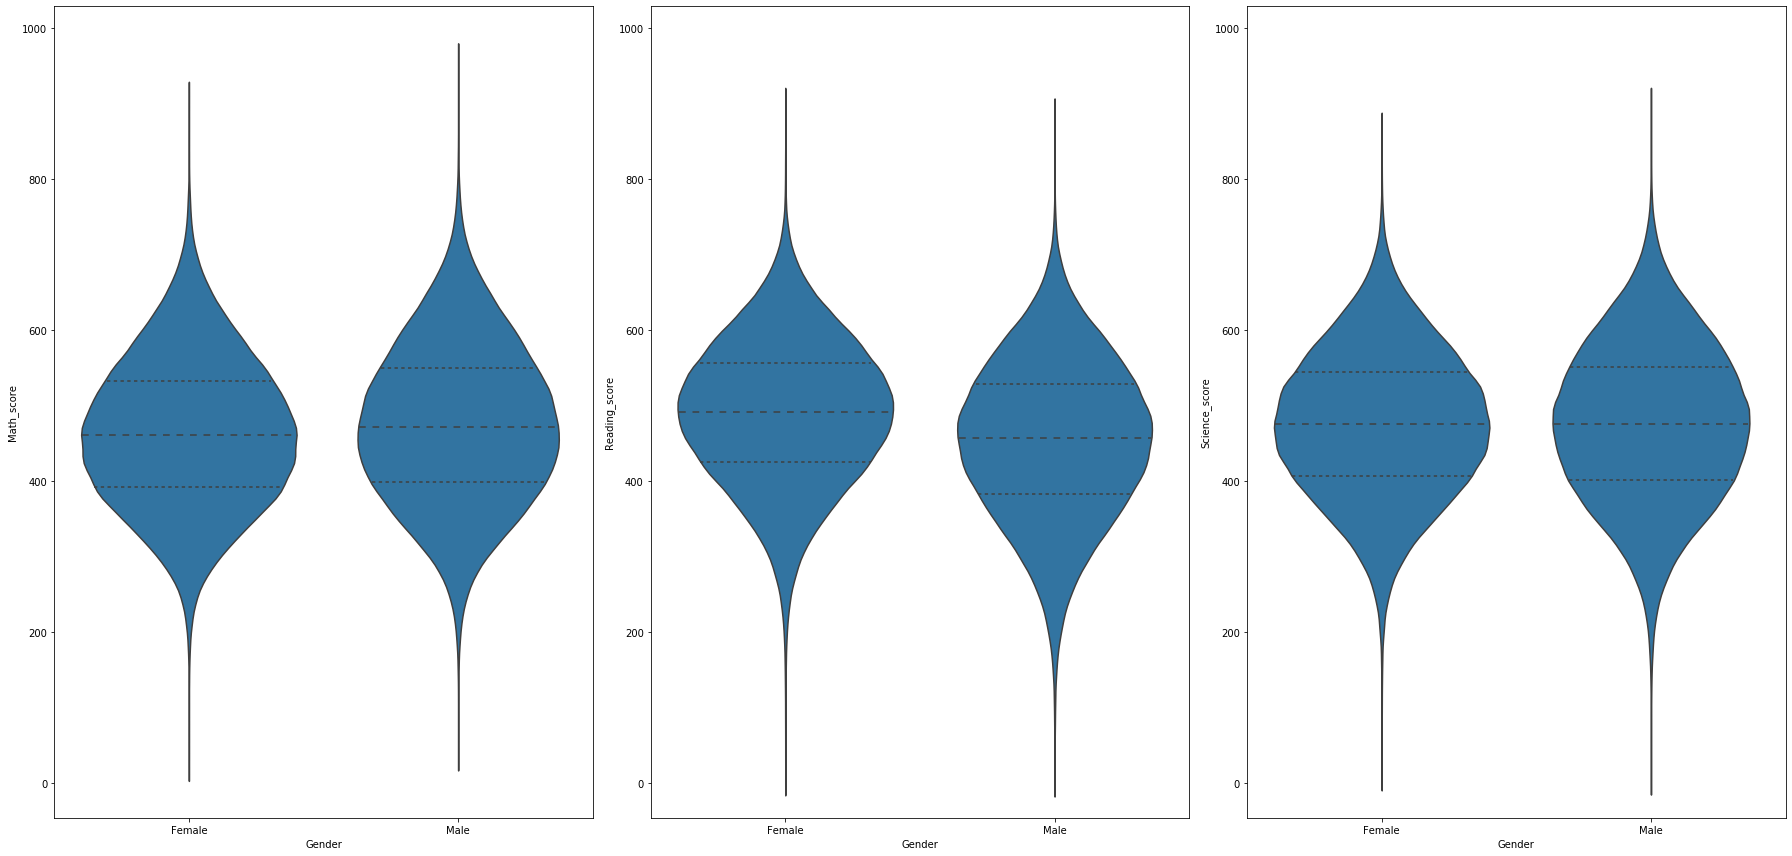

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = pisa, x = 'Gender', y = 'Math_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 2)
sb.violinplot(data = pisa, x = 'Gender', y = 'Reading_score', color = base_color, inner = 'quartile')
plt.ylim(ax1.get_ylim());
plt.subplot(1, 3, 3)
sb.violinplot(data = pisa, x = 'Gender', y = 'Science_score', color = base_color, inner = 'quartile')
plt.ylim(ax1.get_ylim());
fig.tight_layout()

In [38]:
pisa.groupby('Gender').mean()[['Math_score','Reading_score','Science_score']]

,Math_score,Reading_score,Science_score
Gender,,,
Female,464.033534,489.701508,475.332517
Male,475.317572,453.966386,476.215567


*In all countries that participated in PISA 2012, boys outperformed girls by 11 score points in mathematics, but girls significantly outperformed boys in reading – by 45 score points. In science - there is almost no gap on average across all countries.* <br>
*It will be interesting to see if the gender gap is different in individual countries and how it relates to socio-economic status of students*

> #### PISA tests include questionnaires about students' and their parents' attitudes toward mathematics. Can these beliefs be one of the reasons for the gender gap in mathematics? 

#### Parents' beliefs about mathemtics

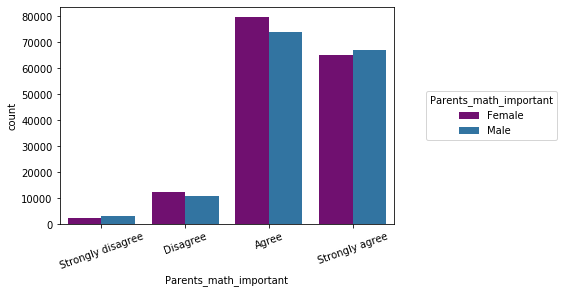

In [39]:
#Parents believe it’s important for student to study mathematics
sb.countplot(data = pisa, x = 'Parents_math_important', hue = 'Gender', palette= ['purple', base_color]);
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Parents_math_important')
plt.xticks(rotation = 20);

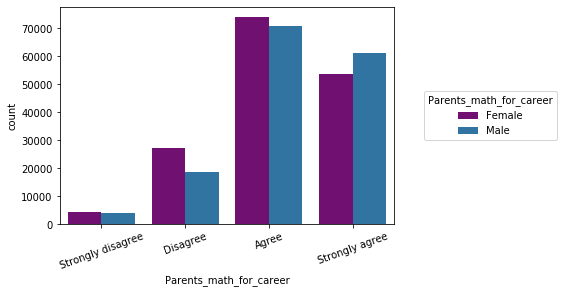

In [40]:
#Parents believe that mathematics is important for student career
sb.countplot(data = pisa, x = 'Parents_math_for_career', hue = 'Gender', palette= ['purple', base_color]);
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Parents_math_for_career')
plt.xticks(rotation = 20);

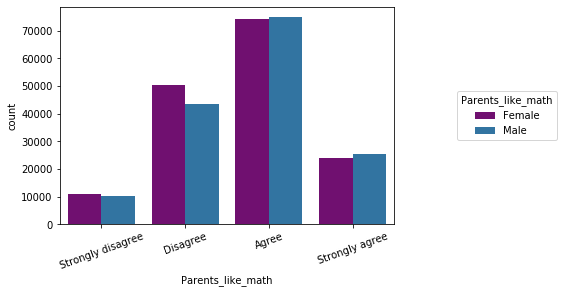

In [41]:
#Parents like mathematics themselves
sb.countplot(data = pisa, x = 'Parents_like_math', hue = 'Gender', palette= ['purple', base_color]);
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Parents_like_math')
plt.xticks(rotation = 20);

*It doesn't look like that beliefs and attitudes toward math are different between girls' and boys' parents. Most parents believe that math is important and encourage students of both genders to study math.*<br>
*Also these variables (Parents_math_important, Parents_math_for_career, Parents_like_math) are part of the Math_motivation variable and there is no significant correlation with math performance. I'll not investigate them further.*

#### Personal beliefs about math

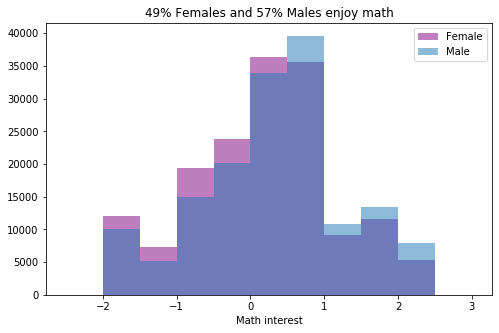

In [42]:
#Mathematics interest and enjoyment
binsize = 0.5
bins = np.arange(-2.5, 3 + binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_interest', bins = bins, color='purple', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_interest', bins = bins, color=base_color, alpha=0.5, label='Male')
plt.xlabel('Math interest')
plt.legend()
fp = int(round(pisa.query('Gender =="Female" and Math_interest>0').Math_interest.count()*100/pisa.query('Gender =="Female"').Math_interest.count()))
mp = int(round(pisa.query('Gender =="Male" and Math_interest>0').Math_interest.count()*100/pisa.query('Gender =="Male"').Math_interest.count()))
plt.title('{:d}%'.format(fp) + ' Females and '+'{:d}%'.format(mp)+ ' Males enjoy math')
plt.grid(False)
plt.show()

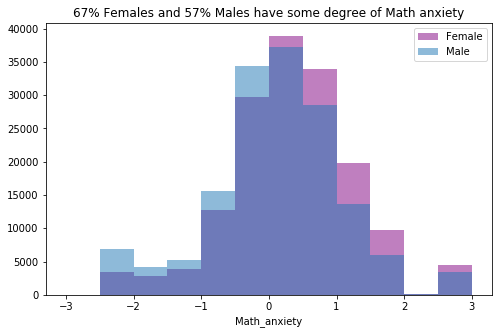

In [43]:
#Math anxiety - feelings of stress and helplessness when dealing with mathematics
binsize = 0.5
bins = np.arange(-3, 3.5, binsize)    
plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_anxiety', bins = bins, color='purple', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_anxiety', bins = bins, color=base_color, alpha=0.5, label='Male')
plt.xlabel('Math_anxiety')
plt.legend()
fp = int(round(pisa.query('Gender =="Female" and Math_anxiety>0').Math_anxiety.count()*100/pisa.query('Gender =="Female"').Math_anxiety.count()))
mp = int(round(pisa.query('Gender =="Male" and Math_anxiety>0').Math_anxiety.count()*100/pisa.query('Gender =="Male"').Math_anxiety.count()))
plt.title('{:d}%'.format(fp) + ' Females and '+'{:d}%'.format(mp)+ ' Males have some degree of Math anxiety')
plt.show()

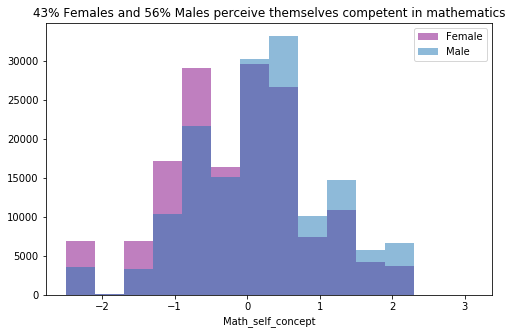

In [44]:
#Math self-concept - perceived competence in mathematics
binsize = 0.4
bins = np.arange(-2.5, 3.5, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_self_concept', bins = bins, color='purple', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_self_concept', bins = bins, color=base_color, alpha=0.5, label='Male')
plt.xlabel('Math_self_concept')
plt.legend()
fp = int(round(pisa.query('Gender =="Female" and Math_self_concept>0').Math_self_concept.count()*100/pisa.query('Gender =="Female"').Math_self_concept.count()))
mp = int(round(pisa.query('Gender =="Male" and Math_self_concept>0').Math_self_concept.count()*100/pisa.query('Gender =="Male"').Math_self_concept.count()))
plt.title('{:d}%'.format(fp) + ' Females and '+'{:d}%'.format(mp)+ ' Males perceive themselves competent in mathematics')
plt.show()

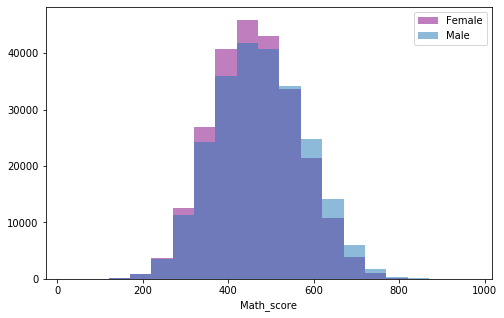

In [45]:
#Math_score
binsize = 50
bins = np.arange(pisa['Math_score'].min(), pisa['Math_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_score', bins = bins, color='purple', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_score', bins = bins, color=base_color, alpha=0.5, label='Male')
plt.xlabel('Math_score')
plt.legend()
plt.show()

*On average boys feel better about math than girls, boys are more interested in math (57% boys vs 47% girls), less anxious about it (57% boys vs 67% girls) and believe themselves competent more (56% boys vs 43% girls). Also girls are less likely than boys to be among the highest-achieving students in mathematics.*

>#### Are there differences in how much boys and girls spend on homework?

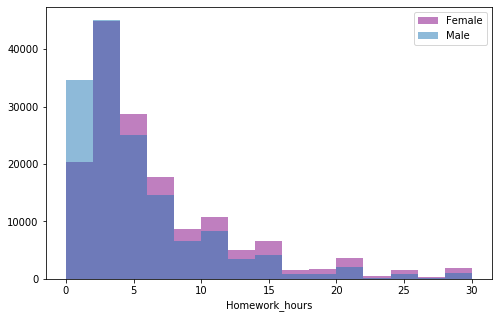

In [46]:
#Homwork by gender
binsize = 2
bins = np.arange(pisa['Homework_hours'].min(), pisa['Homework_hours'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Homework_hours', bins = bins, color='purple', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Homework_hours', bins = bins, color=base_color, alpha=0.5, label='Male')
plt.xlabel('Homework_hours')
plt.legend()
plt.show()

In [47]:
pisa.query('Gender =="Female"')['Homework_hours'].mean()

6.1531674664826115

In [48]:
pisa.query('Gender =="Male"')['Homework_hours'].mean()

4.808552676094458

*On average girls spend 1 hour more on homework than  boys. Also girls are more likely more than 5 hours a week on homework than boys.*

> #### Is there differences among countries in the amount of assigned homework? Especially interesting how much homework have student from top performing in all subjects countries: China-Shanghai, Singapore, Hong Kong-China, Japan, Korea

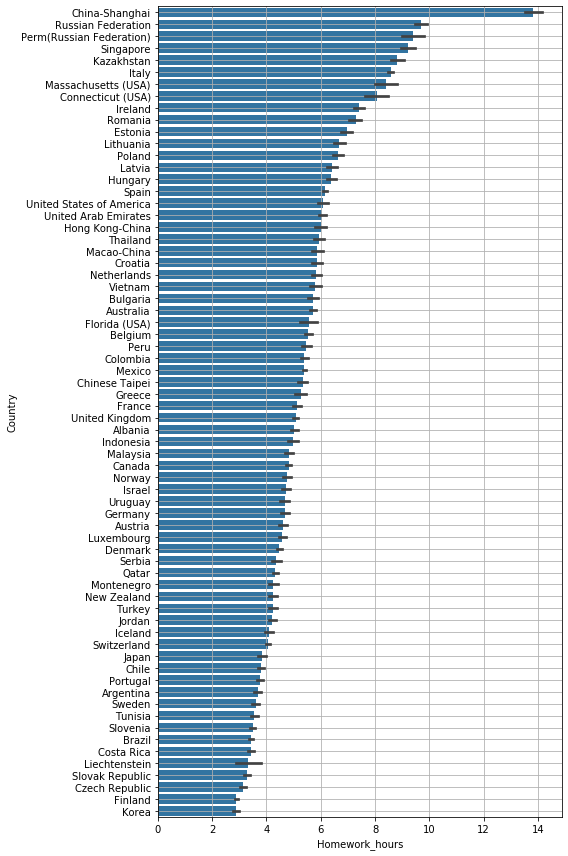

In [49]:
#> Country vs homework hours
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Homework_hours.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Homework_hours', ascending=False), x = 'Homework_hours', y = 'Country', color = base_color, order=grp_order)
plt.grid()
plt.tight_layout()

*It's interesting to see that in the Top 1 performing country in all subjects - China-Shanghai - students have the biggest amount of homework on average - almost 14 hours a week. And Singapore is close by with more than 8 hours a week.<br>
At the same time in Korea (5th in list of most performing countries) students have the smallest amount of homework - around 3 hours.<br>
And we saw earlier that correlation between Homework_hours and test scores is weak - around 0.25*

> #### Correlation between Socio economic status of a student and test scores is pretty big - around 0.4. <br>
> Let's take a closer look.

In [50]:
# Number of students in different Socio_economic_status quantilies
pisa['quarter_ESCS']=pd.qcut(pisa['Socio_economic_status'], 4, labels = ['quarter1','quarter2','quarter3','quarter4'])

In [51]:
# Proficiency Math Level Score points on the PISA scale
cut_labels = ['level 1', 'level 2', 'level 3', 'level 4', 'level 5', 'level 6']
cut_bins = [1, 420.1, 482.4, 544.7, 607.0, 669.3, 10000]
pisa['math_level'] = pd.cut(pisa['Math_score'], bins=cut_bins, labels=cut_labels)

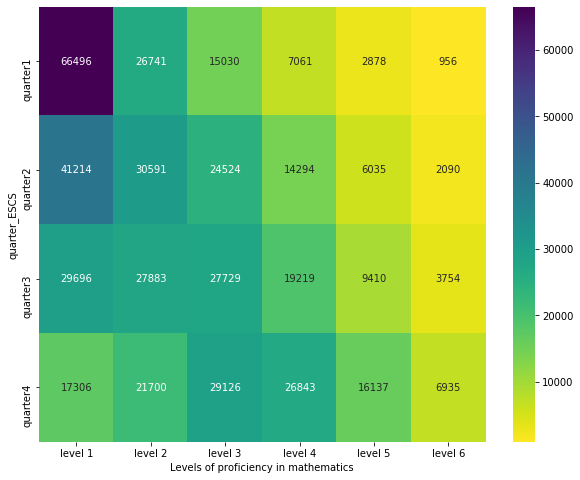

In [52]:
heat_counts = pisa.groupby(['math_level', 'quarter_ESCS']).size()
heat_counts = heat_counts.reset_index(name='count')
heat_counts = heat_counts.pivot(index = 'quarter_ESCS', columns = 'math_level', values = 'count')
plt.figure(figsize=[10, 8])
sb.heatmap(heat_counts, annot = True, fmt = 'd', cmap='viridis_r');
plt.xlabel('Levels of proficiency in mathematics');

*Level 2 on the PISA mathematics scale can be considered a baseline level of proficiency needed in life.<br>
Students who didn't reach Level 2 on math scale are disproportionately come from socio-economically disadvantaged families. More than half students from the first quarter of Socio_economic_status perform below baseline proficiency level.*


>#### Is there a difference among counties in the amount of students from socio-economically disadvantaged families?

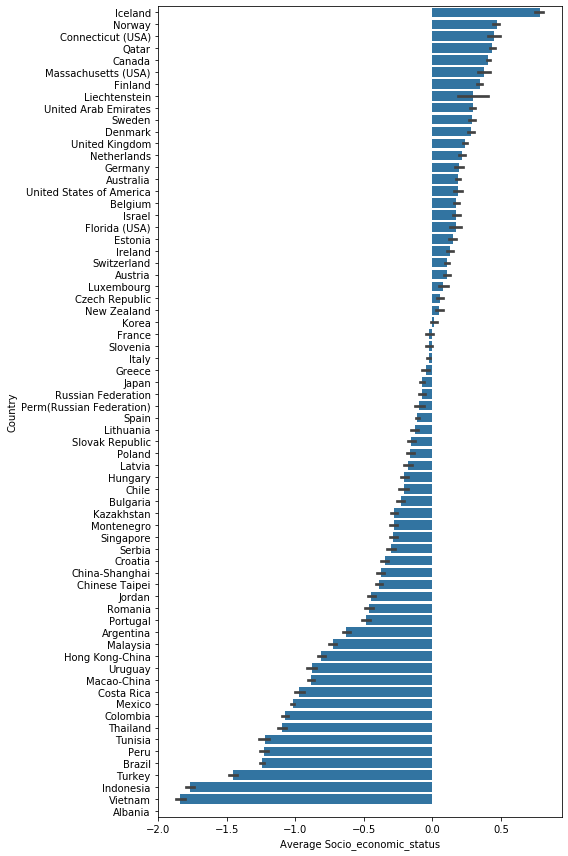

In [53]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Socio_economic_status.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Socio_economic_status', ascending=False), x = 'Socio_economic_status', y = 'Country', color = base_color, order=grp_order)
plt.xlabel('Average Socio_economic_status');
plt.tight_layout()

*5 top performing countries China-Shanghai, Singapore, Hong Kong-China, Japan, Korea are not from among countries with high average Socio-economic status.*

> #### Is there a difference between average Socio-economic status of individual schools in country?

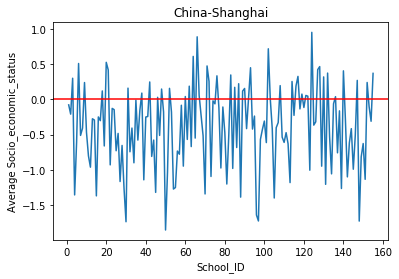

In [54]:
#School_ID is unique only within a Country and not within all dataset
#How do schools different within top performing country China-Shanghai?
pisa.query('Country == "China-Shanghai"').groupby(['School_ID']).mean()['Socio_economic_status'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel('Average Socio_economic_status');
plt.title('China-Shanghai');

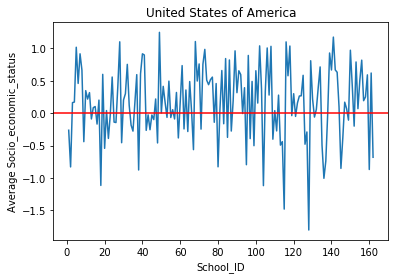

In [55]:
pisa.query('Country == "United States of America"').groupby(['School_ID']).mean()['Socio_economic_status'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel('Average Socio_economic_status');
plt.title('United States of America');

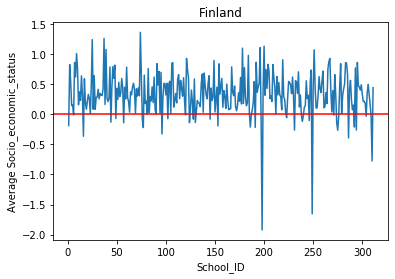

In [56]:
pisa.query('Country == "Finland"').groupby(['School_ID']).mean()['Socio_economic_status'].plot()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel('Average Socio_economic_status');
plt.title('Finland');

*Socio-economic disparities among different schools are large and in China-Shanghai and USA. That shows us the concentration of disadvantaged students within particular schools. In the USA this is the result of residential segregation, the socio-economic profile of rural, city and suburban schools is quite different.
In Finland disparities among schools are not as large with 2 schools as outliers.*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 - All three subject test scores are highly correlated with one another, which tell us the students rarely choose only one subject and neglect others 
 - Correlation between Social_economic status and test results is around 0.4. Students who have more economical, educational resources and support at home tend to get higher scores
 - Amount of time students spend on subjects at school has very small influence on test scores
 - East Asian countries: China-Shanghai, Singapore, Hong Kong-China, Japan, Korea have the highest average test scores in all subjects. Florida has the worst scores among three US states presented in PISA 2012
 - On average all subject's test scores increases with grade, but it is interesting that 10th graders slightly outperform 11th graders
 - In all countries that participated in PISA 2012, boys outperformed girls by 11 score points in mathematics, but girls significantly outperformed boys in reading – by 45 score points. In science - there is almost no gap on average across all countries 
 - Homework_hour has weak correlation with test scores (around 0.25)
 - On average girls spend 1 hour more on homework than  boys. Also girls are more likely to spend more than 5 hours a week on homework than boys
 - It's interesting to see that in the Top 1 performing country in all subjects - China-Shanghai - students have the biggest amount of homework on average - almost 14 hours a week. And Singapore is close by with more than 8 hours a week. At the same time in Korea (5th in list of most performing countries) students have the smallest amount of homework - around 3 hours a weak. 
 - Correlation between Socio economic status of a student and test scores is pretty big - around 0.4. 
 - Level 2 on the PISA mathematics scale can be considered a baseline level of proficiency needed in life. Students who didn't reach Level 2 on math scale are disproportionately come from socio-economically disadvantaged families. More than half students from the first quarter of Socio_economic_status perform below this baseline proficiency level.
 - Socio-economic disparities among different schools are large and in China-Shanghai and USA. That shows us the concentration of disadvantaged students within particular schools. In the USA this is the result of residential segregation, the socio-economic profile of rural, city and suburban schools is quite different. In Finland disparities among schools are not as large with 2 schools as outliers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- On average boys feel better about math than girls, boys are more interested in math (57% boys vs 47% girls), less anxious about it (57% boys vs 67% girls) and believe themselves competent more (56% boys vs 43% girls). Also girls are less likely than boys to be among the highest-achieving students in mathematics.
- Math anxiety is negatively correlated with Math_self_concept (person's believes about his\her abilities in math)
- Math anxiety is negatively correlated not only with math test score, but also with reading and science scores
- There is correlation 0.6 between person's Math_interst and Math_self_concept(beliefs in being good at math)
- On average parents of girls and boys have similar beliefs and attitudes toward math. Most parents believe that math is important and encourage students of both genders to study math.
- Also these variables (Parents_math_important, Parents_math_for_career, Parents_like_math) are part of the Math_motivation variable and there is no significant correlation with math performance.

## Multivariate Exploration

> Earlier we saw that on average boys slightly overperform girls in math. Girls have higher levels of mathematics anxiety which negatively correlated (r=-0.36) with math performance. Girls also reported lower levels of mathematics self_concept (their  perceived competence in mathematics).<br><br>
Let's look at the math gender gap for each country. 

In [57]:
#Calculate difference between average boys and girls math score by country
df_girls_math =pisa.query('Gender =="Female"').groupby(['Country'], as_index=False).mean()[['Country','Math_score']]
df_girls_math.rename(columns={"Math_score":"girl_math"}, inplace=True)
df_boys_math = pisa.query('Gender =="Male"').groupby(['Country'], as_index=False).mean()[['Country','Math_score']]
df_boys_math.rename(columns={"Math_score":"boy_math"}, inplace=True)
df_diff = pd.concat([df_girls_math, df_boys_math['boy_math']], axis=1, sort=False)
df_diff['diff_math'] = df_diff['girl_math'] - df_diff['boy_math']

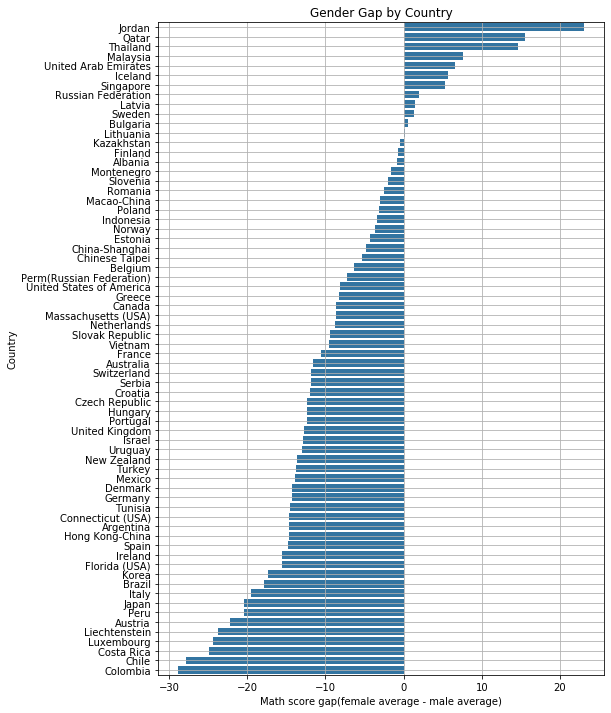

In [58]:
#plot gender gap
plt.figure(figsize=[8, 12])
sb.barplot(data = df_diff.sort_values('diff_math', ascending=False), y ='Country', x = 'diff_math', color=base_color) ;
plt.grid(True)
plt.title('Gender Gap by Country');
plt.xlabel('Math score gap(female average - male average)');


*What is interesting is that there are several countries in which the gender gap is reversed. Girls perform better in math than boys most noticeable in these counties Jordan, Qatar, Thailand, Malaysia, United Arab Emirates, Singapore*<br>
*There also are several countries in which there is no significant gender gap.*<br>
<br>

*What about Math anxiety levels and Math_self_concept (belief in their own abilities) in different countries?*

In [59]:
#Calculate difference between average boys and girls Math_anxiety by country
df_girls_anx =pisa.query('Gender =="Female"').groupby(['Country'], as_index=False).mean()[['Country','Math_anxiety']]
df_girls_anx.rename(columns={"Math_anxiety":"girl_anx"}, inplace=True)
df_boys_anx = pisa.query('Gender =="Male"').groupby(['Country'], as_index=False).mean()[['Country','Math_anxiety']]
df_boys_anx.rename(columns={"Math_anxiety":"boy_anx"}, inplace=True)
df_all_anx = pisa.groupby(['Country'], as_index=False).mean()[['Country','Math_anxiety']]
df_all_anx.rename(columns={"Math_anxiety":"all_anx"}, inplace=True)
df_anx_diff = pd.concat([df_girls_anx, df_boys_anx['boy_anx']], axis=1, sort=False)
df_anx_diff = pd.concat([df_anx_diff, df_all_anx['all_anx']], axis=1, sort=False)
df_anx_diff['diff_anx'] = df_anx_diff['girl_anx'] - df_anx_diff['boy_anx']

In [60]:
#Calculate difference between average boys and girls Math_self_concept by country
df_girls_self =pisa.query('Gender =="Female"').groupby(['Country'], as_index=False).mean()[['Country','Math_self_concept']]
df_girls_self.rename(columns={"Math_self_concept":"girl_self"}, inplace=True)
df_boys_self = pisa.query('Gender =="Male"').groupby(['Country'], as_index=False).mean()[['Country','Math_self_concept']]
df_boys_self.rename(columns={"Math_self_concept":"boy_self"}, inplace=True)
df_all_self = pisa.groupby(['Country'], as_index=False).mean()[['Country','Math_self_concept']]
df_all_self.rename(columns={"Math_self_concept":"all_self"}, inplace=True)
df_self_diff = pd.concat([df_girls_self, df_boys_self['boy_self']], axis=1, sort=False)
df_self_diff = pd.concat([df_self_diff, df_all_self['all_self']], axis=1, sort=False)
df_self_diff['diff_self'] = df_self_diff['girl_self'] - df_self_diff['boy_self']

In [61]:
df_diff = df_diff.merge(df_anx_diff, left_on='Country', right_on='Country')
df_diff = df_diff.merge(df_self_diff, left_on='Country', right_on='Country')

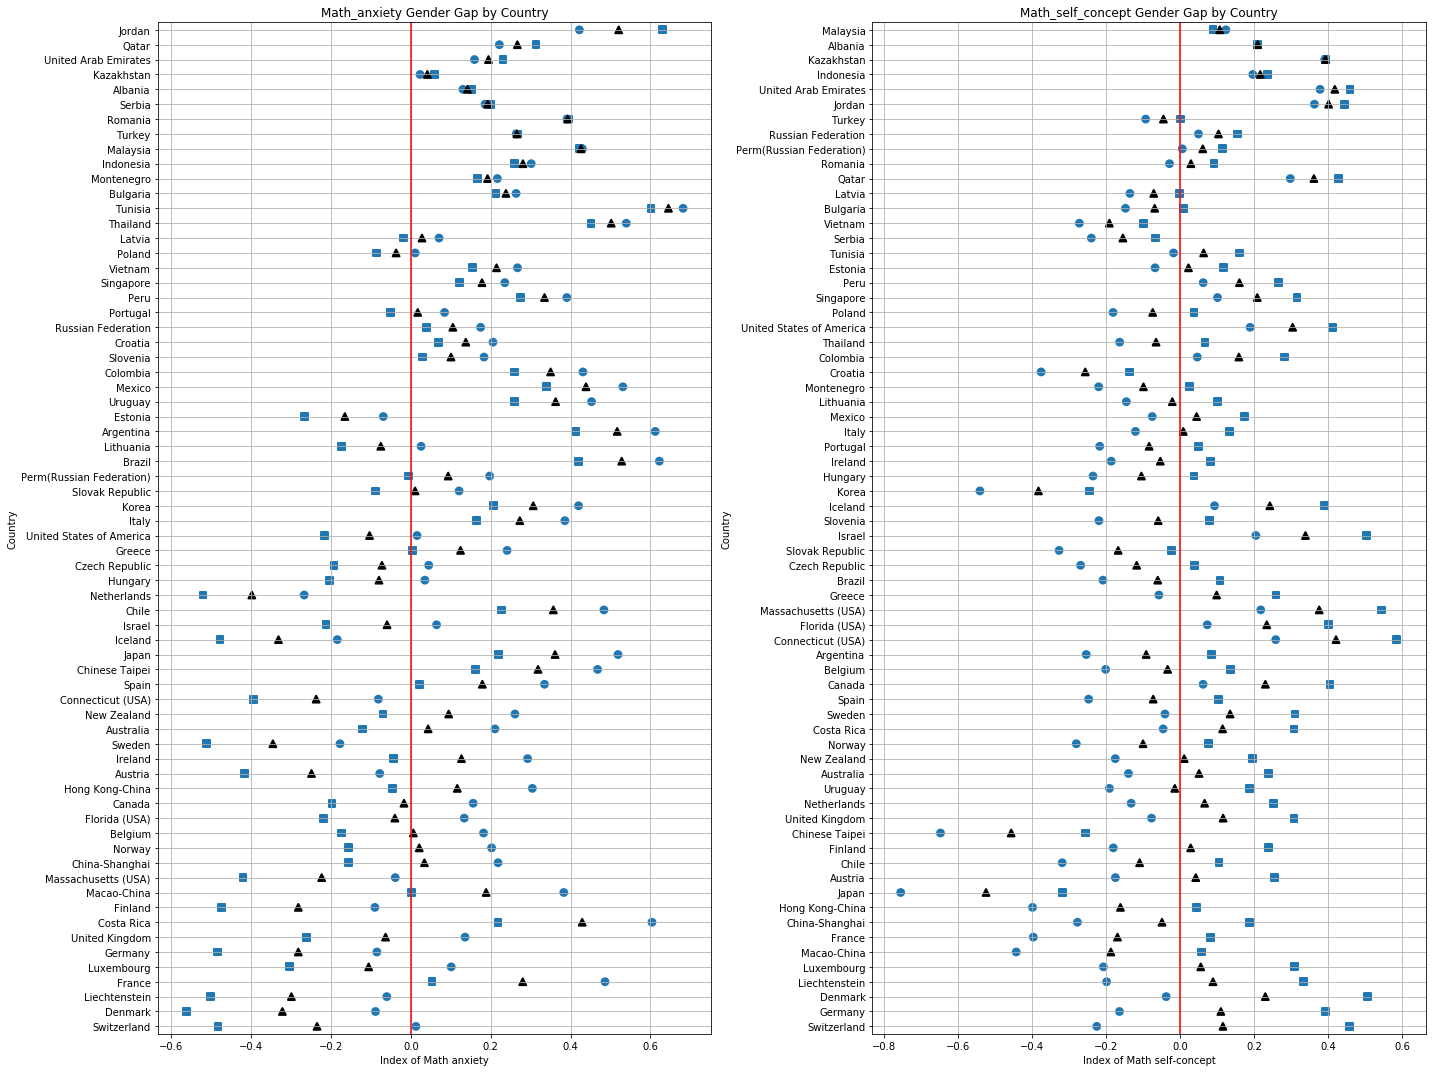

In [62]:
#plot Math_anxiety and Math_self_concept gender gap for each country
fig, ax = plt.subplots(ncols=2, figsize = [20,15]);
plt.subplot(1, 2, 1)
sb.pointplot(data = df_diff.sort_values('diff_anx', ascending=True), y ='Country', x = 'girl_anx', markers=['o'], label='Female', linestyles="") 
sb.pointplot(data = df_diff.sort_values('diff_anx', ascending=True), y ='Country', x = 'boy_anx', markers='s', label='Male',linestyles="") 
sb.pointplot(data = df_diff.sort_values('diff_anx', ascending=True), y ='Country', x = 'all_anx', markers='^',label='All', color='black', linestyles="") 
plt.axvline(x=0, color = 'red')
plt.grid(True)
plt.title('Math_anxiety Gender Gap by Country');
plt.xlabel('Index of Math anxiety');
plt.subplot(1, 2, 2)
sb.pointplot(data = df_diff.sort_values('diff_self', ascending=False), y ='Country', x = 'girl_self', label='Female', markers='o', linestyles="") 
sb.pointplot(data = df_diff.sort_values('diff_self', ascending=False), y ='Country', x = 'boy_self', label='Male', markers='s', linestyles="") 
sb.pointplot(data = df_diff.sort_values('diff_self', ascending=False), y ='Country', x = 'all_self', label='All', markers='^', color='black', linestyles="") 
plt.axvline(x=0, color = 'red')
plt.grid(True)
plt.title('Math_self_concept Gender Gap by Country');
plt.xlabel('Index of Math self-concept');
fig.tight_layout()

*These figures show averages of Math_anxiety and Math_self_concept for boys and girls by country and sorted to show countries with smallest average differences on top.*<br>
*Across most countries girls reported stronger feelings of mathematics anxiety than boys with exception of Jordan, the United Arab Emirates and Qatar, Kazakhstan, Albania, Serbia*<br>
*Also across almost all countries (except Malaysia) on average more boys than girls believe they are good at mathematics.*<br><br>
*I'll plot the same data as barplots for the differences between boy's and girls averages, so it would be easier to see where the gap is reversed.*<br> 

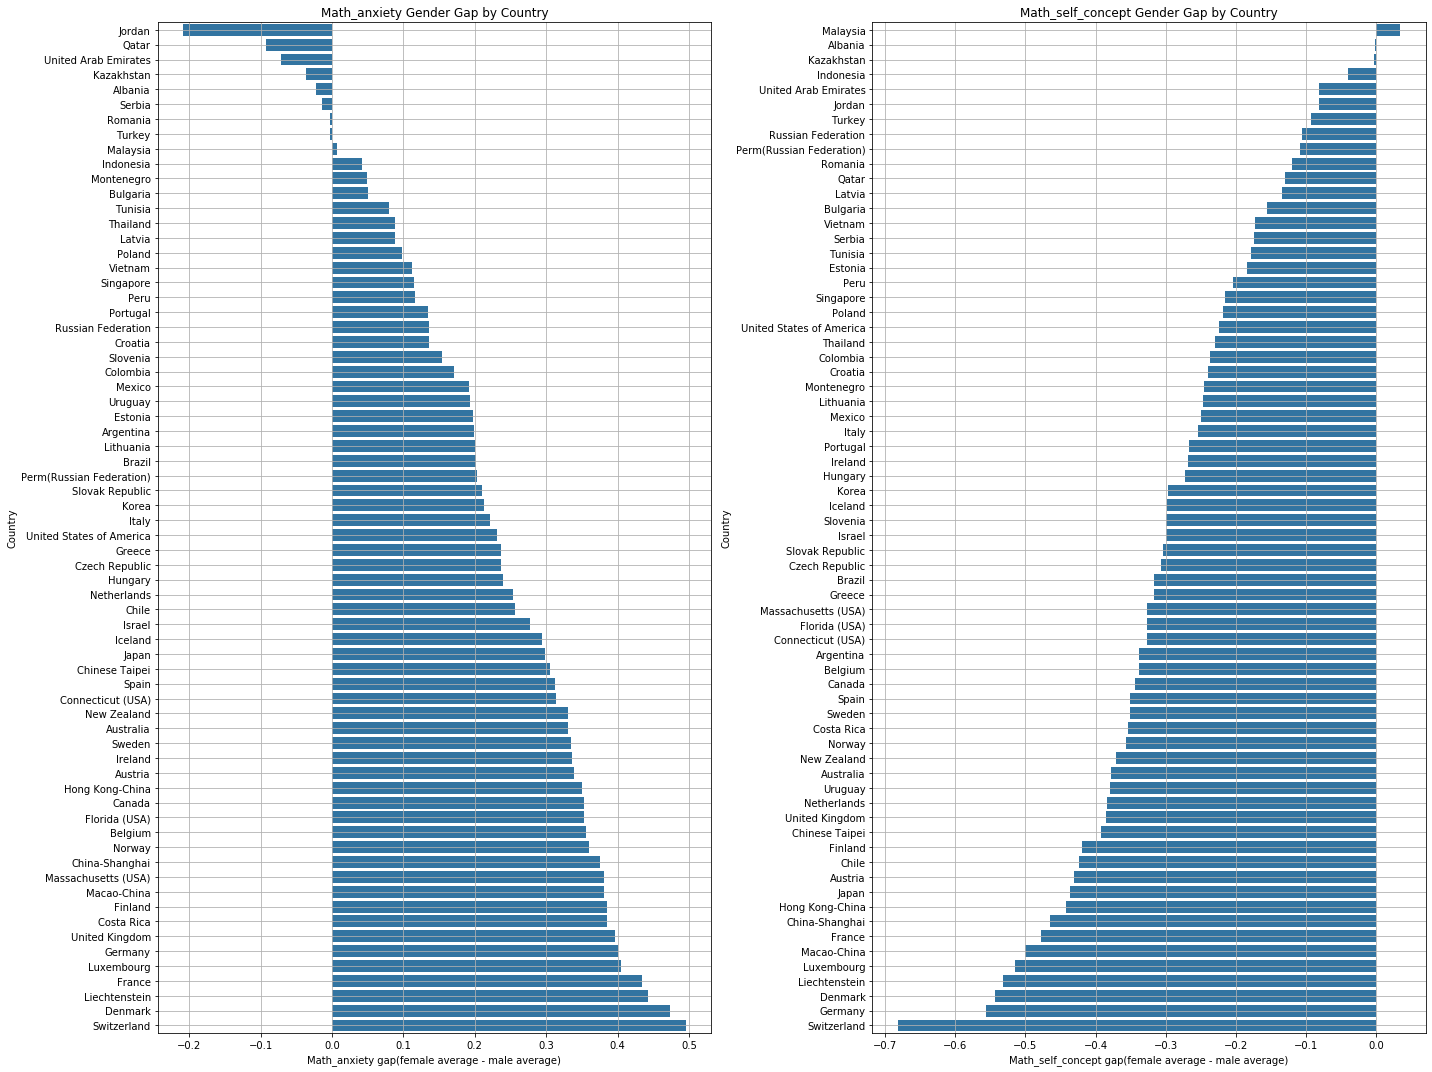

In [63]:
#plot Math_anxiety and Math_self_concept gender gap for each country
fig, ax = plt.subplots(ncols=2, figsize = [20,15]);
plt.subplot(1, 2, 1)
sb.barplot(data = df_diff.sort_values('diff_anx', ascending=True), y ='Country', x = 'diff_anx', color=base_color) ;
plt.grid(True)
plt.title('Math_anxiety Gender Gap by Country');
plt.xlabel('Math_anxiety gap(female average - male average)');
plt.subplot(1, 2, 2)
sb.barplot(data = df_diff.sort_values('diff_self', ascending=False), y ='Country', x = 'diff_self', color=base_color) ;
plt.grid(True)
plt.title('Math_self_concept Gender Gap by Country');
plt.xlabel('Math_self_concept gap(female average - male average)');
fig.tight_layout()

*Countries with reversed gender gap in math Jordan, Qatar, Thailand, Malaysia, United Arab Emirates, Singapore are on top places in both barplots showing small or reversed gender gap in Math anxiety or Math self concept.*<br>
*It may be a good idea to plot a scatterplot to see if there relationship between math gender gap and Math anxiety or Math self concept gender gap.*
*Each dot will be a country.*

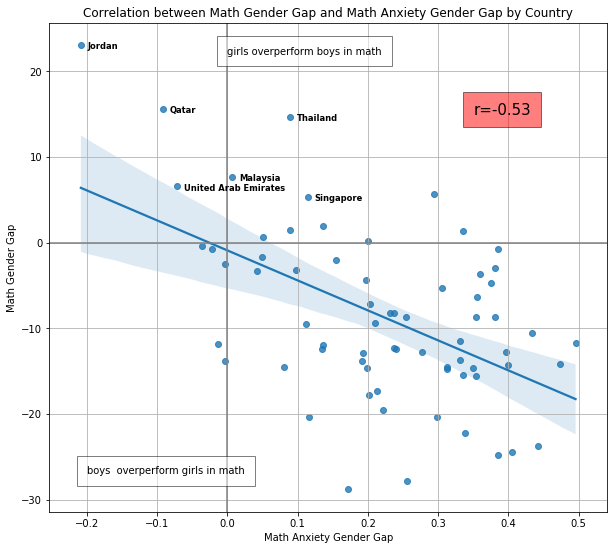

In [64]:
p=sb.regplot(data=df_diff, x='diff_anx',y='diff_math',  marker="o", color=base_color);
p.figure.set_size_inches(10, 9)
plt.grid(True)
plt.axvline(x=0, color = 'grey')
plt.axhline(y=0, color = 'grey')
counties_top5 = ['Qatar', 'Jordan','Thailand','Malaysia', 'United Arab Emirates','Singapore']
hr = 'left'
offset = 0.01
ver = 'center_baseline'
for line in range(0,df_diff.shape[0]):
    if df_diff.Country[line] in counties_top5:
        p.text(df_diff.diff_anx[line]+offset, df_diff.diff_math[line], df_diff.Country[line], horizontalalignment=hr, verticalalignment=ver, size='small', color='black', weight='semibold')
p.text(0.35, 15, r'r=' + '{:0.2f}'.format(df_diff['diff_math'].corr(df_diff['diff_anx'])), fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});
p.text(0, 22, r'girls overperform boys in math', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});
p.text(-0.2, -27, r'boys  overperform girls in math', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});
plt.title('Correlation between Math Gender Gap and Math Anxiety Gender Gap by Country');
plt.xlabel('Math Anxiety Gender Gap');
plt.ylabel('Math Gender Gap');

*This shows us a strong negative relationship between differences in average math scores of boys and girls and differences in average levels of math anxiety across all countries in PISA 2012.*<br>
*By decreasing differences in math anxiety and math anxiety overall we can improve math performance.*

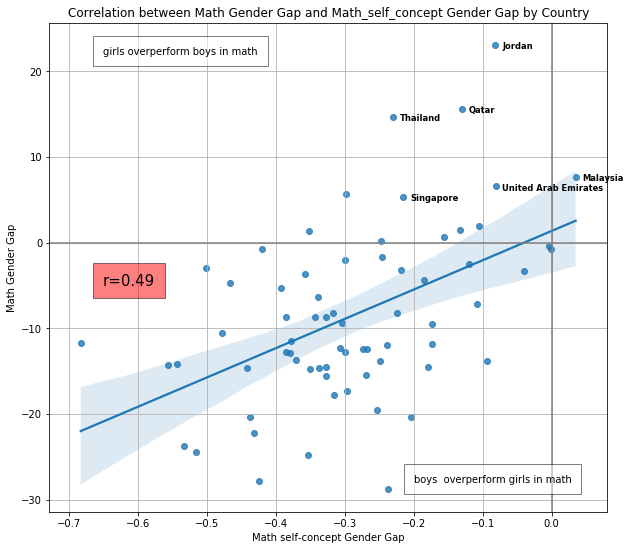

In [65]:
#Math_self_concept
p=sb.regplot(data=df_diff, x='diff_self',y='diff_math',  marker="o", color=base_color);
p.figure.set_size_inches(10, 9)
plt.grid(True)
plt.axvline(x=0, color = 'grey')
plt.axhline(y=0, color = 'grey')
counties_top5 = ['Qatar', 'Jordan','Thailand','Malaysia', 'United Arab Emirates', 'Singapore']
hr = 'left'
offset = 0.01
ver = 'center_baseline'
for line in range(0,df_diff.shape[0]):
    if df_diff.Country[line] in counties_top5:
        p.text(df_diff.diff_self[line]+offset, df_diff.diff_math[line], df_diff.Country[line], horizontalalignment=hr, verticalalignment=ver, size='small', color='black', weight='semibold')
p.text(-0.65, -5, r'r=' + '{:0.2f}'.format(df_diff['diff_math'].corr(df_diff['diff_self'])), fontsize=15,
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});
p.text(-0.65, 22, r'girls overperform boys in math', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});
p.text(-0.2, -28, r'boys  overperform girls in math', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});
plt.title('Correlation between Math Gender Gap and Math_self_concept Gender Gap by Country');
plt.xlabel('Math self-concept Gender Gap');
plt.ylabel('Math Gender Gap');

*This shows us that gender differences in math are not innate and can be decreased or even reversed.*

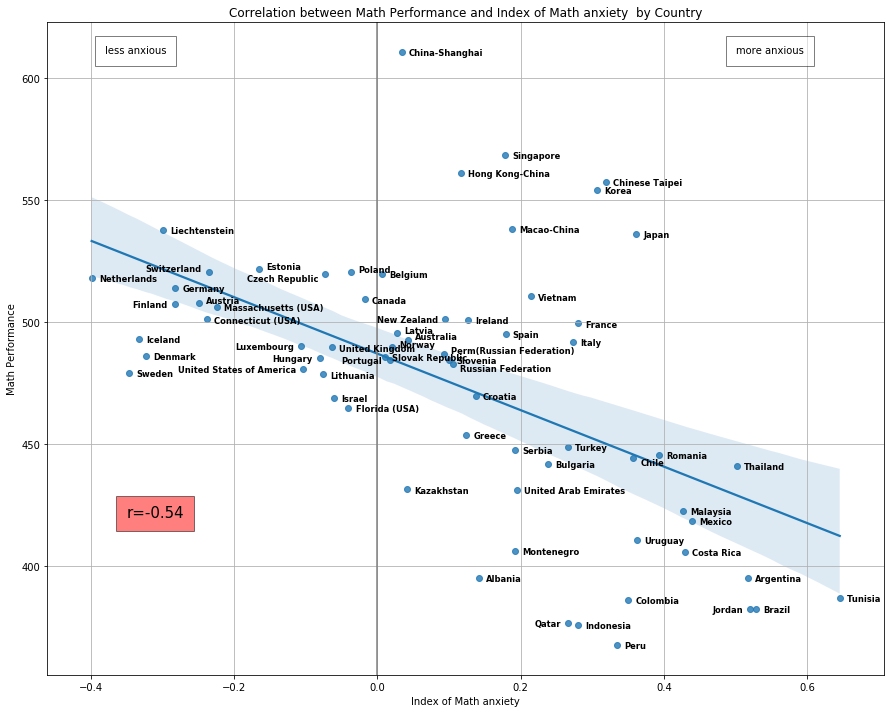

In [66]:
#Correlation between math_score and Math_anxiety  by Country
df= pisa.groupby('Country').mean()[['Math_anxiety', 'Math_score']]
df = df.reset_index()
p=sb.regplot(data=df, x='Math_anxiety', y='Math_score',  marker="o", color=base_color)
p.figure.set_size_inches(15, 12)
plt.grid(True)
plt.axvline(x=0, color = 'grey')
counties_left = ['Qatar', 'Jordan','Hungary','Portugal', 'New Zealand', 'Switzerland', 'Czech Republic', 'Luxembourg', 'United States of America', 'Finland']
counties_top = ['Estonia', 'Poland','Latvia','Australia', 'Norway', 'Perm(Russian Federation)', 'Switzerland', 'Austria']
counties_bottom = ['Czech Republic','Russian Federation', 'Chile']
for line in range(0,df.shape[0]):
    hr = 'left'
    offset = 0.01
    ver = 'center_baseline'
    if df.Country[line] in counties_left:
        hr = 'right'   
        offset = - 0.01
        #ver = 'bottom'
    if df.Country[line] in counties_top:        
        ver = 'baseline'
    if df.Country[line] in counties_bottom:        
        ver = 'top'
    p.text(df.Math_anxiety[line]+offset, df.Math_score[line], df.Country[line], horizontalalignment=hr, verticalalignment=ver, size='small', color='black', weight='semibold')
p.text(-0.35, 420, r'r=' + '{:0.2f}'.format(df['Math_anxiety'].corr(df['Math_score'])), fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});
p.text(-0.38, 610, r'less anxious', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});
p.text(0.5, 610, r'more anxious', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});
plt.title('Correlation between Math Performance and Index of Math anxiety  by Country');
plt.xlabel('Index of Math anxiety');
plt.ylabel('Math Performance');

> Socio_economic_status of a student also showed correlation with student's performance. <br>
How does this correlation look for each country?

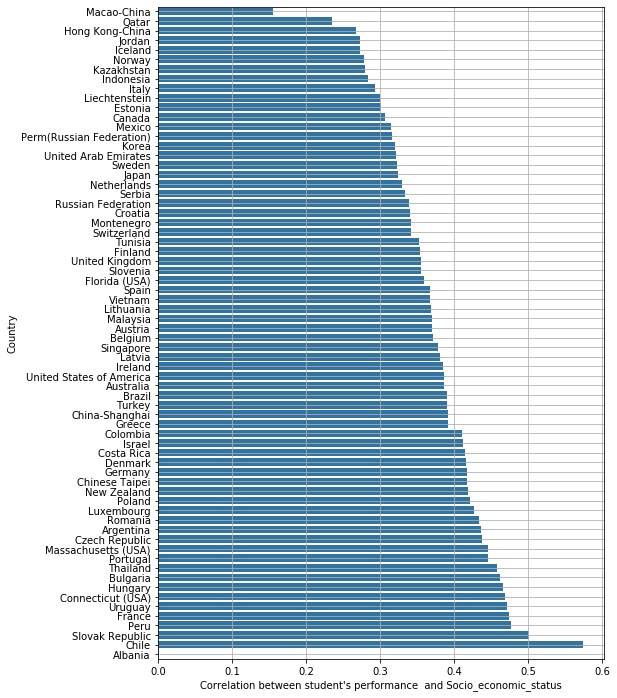

In [67]:
#Correlation between math_score and Socio_economic_status by Country
data = []
for country in pisa.Country.unique():
    df = pisa[pisa['Country'] == country]
    cor = df['Math_score'].corr(df['Socio_economic_status'])
    data.append([country, cor])
df_math_ses_cor = pd.DataFrame(data, columns = ['Country', 'Correlation'])
plt.figure(figsize=(8,12))
sb.barplot(data = df_math_ses_cor.sort_values('Correlation', ascending=True), y ='Country', x = 'Correlation', color=base_color);
plt.grid()
plt.xlabel("Correlation between student's performance  and Socio_economic_status");


How disadvantaged students are distributed across schools within countries? Do some national school systems give better help to their low performing students?

In [68]:
#Calculate averages by Country and School_ID
p_sch = pisa.groupby(['Country','School_ID']).mean()[['Socio_economic_status', 'Math_score']]
#Correlation between Math performance of a school and socio-economic profile of schools
p_sch['Math_score'].corr(p_sch['Socio_economic_status'])

0.6541202020424667

*Correlation between Math performance of a school and socio-economic profile of schools (0.65) is higher than correlation between Math performance of students and their socio-economic status.*

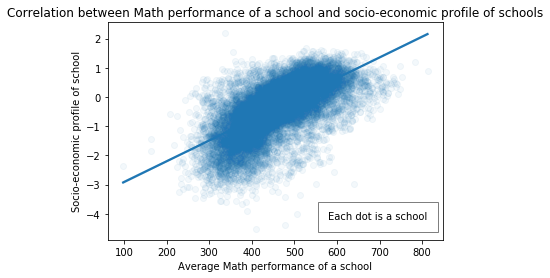

In [69]:
#Across all countries
p_sch=p_sch.reset_index() 
sb.regplot(data=p_sch, x='Math_score',y='Socio_economic_status', scatter_kws = {'alpha' : 0.05} );
plt.title("Correlation between Math performance of a school and socio-economic profile of schools");
plt.xlabel('Average Math performance of a school');
plt.ylabel('Socio-economic profile of school')
plt.text(580,-4.2, r'Each dot is a school', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});

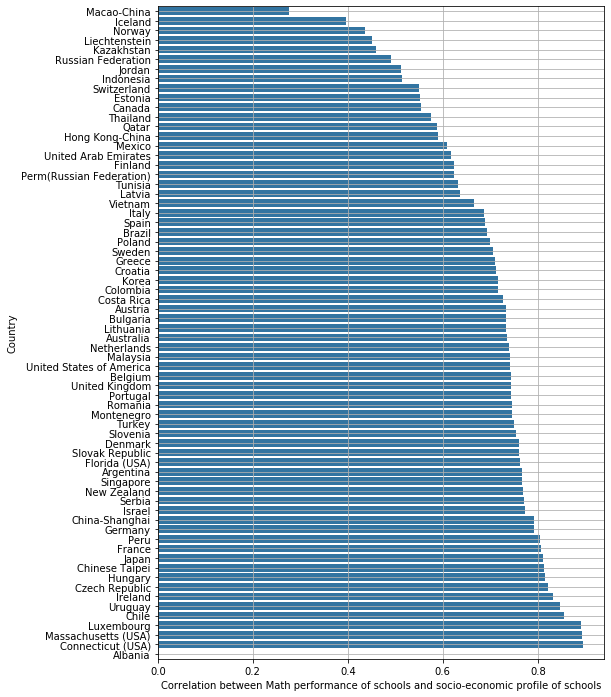

In [70]:
#Correlation between Math performance of a school and socio-economic profile of schools by Country
data = []
for country in p_sch.Country.unique():
    df = p_sch[p_sch['Country'] == country]
    cor = df['Math_score'].corr(df['Socio_economic_status'])
    data.append([country, cor])
df_math_ses_cor = pd.DataFrame(data, columns = ['Country', 'Correlation'])
plt.figure(figsize=(8,12))
sb.barplot(data = df_math_ses_cor.sort_values('Correlation', ascending=True), y ='Country', x = 'Correlation', color=base_color);
plt.grid()
plt.xlabel("Correlation between Math performance of schools and socio-economic profile of schools");

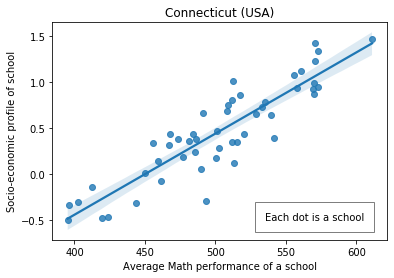

In [71]:
#Worst school system 
sb.regplot(data=p_sch[p_sch['Country'] == 'Connecticut (USA)'], x='Math_score',y='Socio_economic_status');
plt.title("Connecticut (USA)");
plt.xlabel('Average Math performance of a school');
plt.ylabel('Socio-economic profile of school')
plt.text(535,-0.5, r'Each dot is a school', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});

In [72]:
df_math_ses_cor[df_math_ses_cor['Country'] == 'Connecticut (USA)']

,Country,Correlation
12,Connecticut (USA),0.895182


*Very strong correlation (0.895) between socio-economic profile of schools and Math performance.*

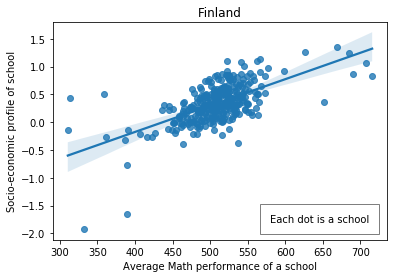

In [73]:
sb.regplot(data=p_sch[p_sch['Country'] == 'Finland'], x='Math_score',y='Socio_economic_status');
plt.title("Finland");
plt.xlabel('Average Math performance of a school');
plt.ylabel('Socio-economic profile of school')
plt.text(580,-1.8, r'Each dot is a school', fontsize=10,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10});

In [74]:
df_math_ses_cor[df_math_ses_cor['Country'] == 'Finland']

,Country,Correlation
18,Finland,0.623155


*Student's performance can be influenced not only by students’ backgroundand or student's beliefs, but also by the school they attend. Some countries have schools with a big concentration of disadvantaged students and some spread students more equivally. Or may be resources are spread more equally that disadvantaged students receive more support.*

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section I worked more on the relationship between socio-economic status and performance at school. I looked at this relationship within individual counties. In some countries (Macao-China, Qatar) correlation between socio-economic status and math performance is quite low (around 0.2) and in some like Chily it's almost 0.6. Then I looked at how disadvantaged students are distributed across schools within countries. I found out that on average correlation between Math performance of a school and socio-economic profile of schools (0.65) across all countries is higher than correlation between Math performance of students and their socio-economic status(0.4). Which means that disadvantaged students are gathered together at some schools, it can be rural schools or city schools like in the USA. And then to compare different counties I looked how correlation between Math performance of a school and socio-economic profile of schools is in each country. Some countries are very segregated. For example, in Connecticut (USA) correlation coefficient between Math performance of a school and socio-economic profile of school is 0.895.<br>

>Also I looked closer at gender differences in math and connection with math anxiety and math self-concept(beliefs about own abilities). I calculated averages for Math score, index of math anxiety and index of math self-concept separately for boys and girls for each country and than calculated differences to get gender gap for all three variables.<br>
I found out that there is a negative correlation(-0.53) between math performance gender gap and math anxiety gender gap. The smaller their difference between average anxiety levels of girls and boys, the smaller their difference between average math performance of girls and boys. <br>
Correlation between math performance gender gap and math self-concept gender gap is smaller (0.49). More girls believe they are good at math, the smaller is the average math performance difference between genders.


### Were there any interesting or surprising interactions between features?

> What was interesting is that there are several countries in which the math gender gap is reversed. Girls perform better in math than boys. Most noticeable of these counties are Jordan, Qatar, Thailand, Malaysia, United Arab Emirates, Singapore<br>
There also are several countries in which there is no significant gender gap.<br>


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## References

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.read_csv.html <br>
https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf <br>
https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf<br>
https://stackoverflow.com/questions/41659188/how-to-adjust-subplot-size-in-seaborn <br>
https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point<br>
https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/<br>
https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.axes.Axes.text.html<br>
https://stackoverflow.com/questions/57417970/how-to-set-custom-colors-on-a-count-plot-in-seaborn<br>
